<a href="https://colab.research.google.com/github/leonfr98/fraud-detection-app/blob/main/AI_Final_Project_Fraud_ForGitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preface - What it's all about

This is a final project in a course AI Data Science.
I wanted to make something similar to my daily work - to analyze a dataset of a credit cards transactions.
This dataset is of volume 1.048M transactions and is a part (roundly a half) of a larger dataset (1.85M) transactions from Kaggle.
I choose to analyze a fraud behaviours inside the dataset

# Imports and pre-analysis

In [ ]:
#Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Done by direct import to a session's environment - due to a file's size
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
# Dataset columns
df = pd.read_csv('credit_card_transactions_cut1.csv')
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [ ]:
# Unique values in columns
for c in df.columns:
    print(f"{c}: {df[c].nunique()}")

Unnamed: 0: 1048575
trans_date_trans_time: 476595
cc_num: 943
merchant: 693
category: 14
amt: 48602
first: 348
last: 479
gender: 2
street: 965
city: 879
state: 51
zip: 952
lat: 950
long: 951
city_pop: 865
job: 493
dob: 950
trans_num: 1048575
unix_time: 1030650
merch_lat: 1016437
merch_long: 1034825
is_fraud: 2
merch_zipcode: 28236


In [ ]:
#Dropping unnecessary columns
#cols_to_drop = ['Unnamed: 0', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long','street', 'city', 'state', 'zip','lat', 'long']
cols_to_drop = ['Unnamed: 0', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'city']
df.drop(columns=cols_to_drop,inplace=True, errors='ignore')
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'is_fraud', 'merch_zipcode'],
      dtype='object')

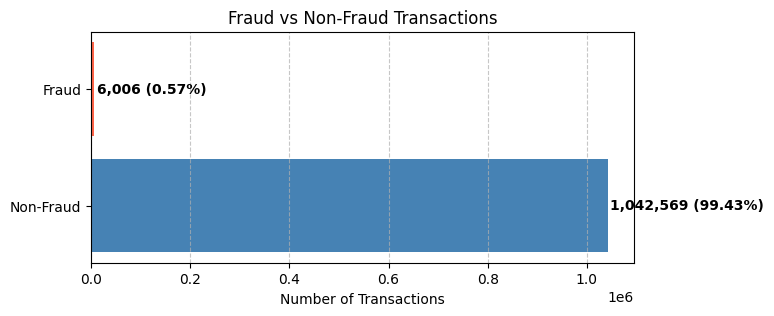

In [ ]:
#Building a barplot of frauds
import matplotlib.pyplot as plt

# Counts
fraud_count = df[df['is_fraud'] == 1]['is_fraud'].count()
nonfraud_count = df[df['is_fraud'] == 0]['is_fraud'].count()
total = fraud_count + nonfraud_count

# Horizontal barplot
plt.figure(figsize=(7,3))
bars = plt.barh(['Non-Fraud', 'Fraud'],
                [nonfraud_count, fraud_count],
                color=['steelblue','tomato'])
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Number of Transactions")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate bars with counts + percentages
for bar, count in zip(bars, [nonfraud_count, fraud_count]):
    width = bar.get_width()
    pct = count / total * 100
    plt.text(width + total*0.005,  # place to the right of bar
             bar.get_y() + bar.get_height()/2,
             f"{count:,} ({pct:.2f}%)",
             va='center', ha='left', fontweight='bold')

plt.show()


In [ ]:
# Creating new time-related columns for a future analysis
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d/%m/%Y %H:%M')
df['hour_of_day']=df['hour'] = df['trans_date_trans_time'].dt.hour

In [ ]:
#Does every customer has a unique credit card? No! There are frauds.

df['customer_name'] = df['first'] + ' ' + df['last']

len(df.cc_num.unique()) #943
len(df.customer_name.unique()) #956
#956 customers and only 943 credit cards - at least 13 cards are stolen
#Unique merchants
len(df.merchant.unique()) #693
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,state,zip,lat,long,city_pop,job,is_fraud,merch_zipcode,hour_of_day,hour,customer_name
0,2019-01-01 00:00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0,28705.0,0,0,Jennifer Banks
1,2019-01-01 00:00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,0,NaN,0,0,Stephanie Gill
2,2019-01-01 00:00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,0,83236.0,0,0,Edward Sanchez
3,2019-01-01 00:01:00,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,MT,59632,46.2306,-112.1138,1939,Patent attorney,0,NaN,0,0,Jeremy White
4,2019-01-01 00:03:00,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,0,22844.0,0,0,Tyler Garcia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2020-03-10 16:07:00,6.011980e+15,fraud_Fadel Inc,health_fitness,77.00,Haley,Wagner,F,05561 Farrell Crescent,MD,21405,39.0305,-76.5515,92106,"Accountant, chartered certified",0,21676.0,16,16,Haley Wagner
1048571,2020-03-10 16:07:00,4.839040e+15,"fraud_Cremin, Hamill and Reichel",misc_pos,116.94,Meredith,Campbell,F,043 Hanson Turnpike,IA,52563,41.1826,-92.3097,1583,Geochemist,0,50143.0,16,16,Meredith Campbell
1048572,2020-03-10 16:08:00,5.718440e+11,"fraud_O'Connell, Botsford and Hand",home,21.27,Susan,Mills,F,005 Cody Estates,KY,40202,38.2507,-85.7476,736284,Engineering geologist,0,42566.0,16,16,Susan Mills
1048573,2020-03-10 16:08:00,4.646850e+18,fraud_Thompson-Gleason,health_fitness,9.52,Julia,Bell,F,576 House Crossroad,NY,11796,40.7320,-73.1000,4056,Film/video editor,0,NaN,16,16,Julia Bell


In [ ]:
# Set of compromized cards - for future investigation.
# Step 1: Earliest fraud time per cc_num
fraud_df = df[df['is_fraud'] == 1]
earliest_fraud_time = fraud_df.groupby('cc_num')['trans_date_trans_time'].min().reset_index()
earliest_fraud_time.rename(columns={'trans_date_trans_time': 'first_fraud_time'}, inplace=True)

# Step 2: Merge with original data
df_with_fraud_time = df.merge(earliest_fraud_time, on='cc_num', how='left')

# Step 3: Compare transaction time to fraud time
df_with_fraud_time['used_before_fraud'] = (
    (df_with_fraud_time['is_fraud'] == 0) &
    (df_with_fraud_time['trans_date_trans_time'] < df_with_fraud_time['first_fraud_time'])
)

# Optional: Only show compromised cards
compromised_cards = df_with_fraud_time[df_with_fraud_time['used_before_fraud']]
print (compromised_cards[['cc_num','merchant']])

               cc_num                             merchant
3        3.534090e+15   fraud_Kutch, Hermiston and Farrell
5        4.767270e+15     fraud_Stroman, Hudson and Erdman
6        3.007470e+13                fraud_Rowe-Vandervort
7        6.011360e+15                 fraud_Corwin-Collins
8        4.922710e+15                     fraud_Herzog Ltd
...               ...                                  ...
1044302  3.589290e+15   fraud_Kutch, Hermiston and Farrell
1044900  3.589290e+15              fraud_Powlowski-Weimann
1044920  3.546670e+15  fraud_Langosh, Wintheiser and Hyatt
1046157  3.589290e+15       fraud_Lesch, D'Amore and Brown
1046257  3.546670e+15                     fraud_Bruen-Yost

[296051 rows x 2 columns]


In [ ]:
#Card is stolen/generated from the beginning - for a detective set later

# Step 1: Sort by timestamp
df = df.sort_values(by=['cc_num', 'trans_date_trans_time'])

# Step 2: Get the first transaction per card
first_tx = df.groupby('cc_num').first().reset_index()

# Step 3: Filter those where first transaction was a fraud
originally_fraud_cards = first_tx[first_tx['is_fraud'] == 1]

result=originally_fraud_cards[['cc_num','customer_name','merchant']]
print(result)

# Optional: view how many
#print("Number of originally fraudulent cards:", originally_fraud_cards.shape[0]) #55

           cc_num          customer_name  \
10   5.018510e+11         Sydney Morales   
12   5.018950e+11         Angelica Lopez   
32   5.778910e+11         Lisa Carpenter   
61   6.761800e+11      Brittany Mccarthy   
79   4.076170e+12         Bradley Adkins   
102  4.457490e+12              John Ross   
115  4.593570e+12          Chelsea Silva   
116  4.598030e+12  Christopher Contreras   
122  4.629130e+12         Brandy Johnson   
137  4.844240e+12         David Santiago   
142  4.975460e+12      Danielle Schaefer   
199  3.049970e+13        Austin Phillips   
226  3.853420e+13           James Taylor   
231  3.881750e+13         Molly Marshall   
240  1.800380e+14         Savannah Clark   
290  3.401870e+14             Misty Hart   
309  3.452260e+14     Christopher Wilson   
322  3.498130e+14           Susan Garcia   
350  3.756230e+14           Karen Brewer   
371  3.782630e+14             Jacob Snow   
405  2.287280e+15          Calvin Molina   
409  2.295960e+15          Tammy

In [ ]:
'#Adding features for future training
df['isLateEvening'] = df['hour_of_day'].apply(lambda x: 1 if 22 <= x <= 23 else 0)
df['isWeekend'] = df['trans_date_trans_time'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
#df['isMidWeek']=df['trans_date_trans_time'].dt.dayofweek.apply(lambda x: 1 if x in (1,2) else 0)
df['isMan']=df['gender'].apply(lambda x: 1 if x=='M' else 0)

In [ ]:
# Organizing fraud and non-fraud in one dataset to learn common patterns.
fraud_only_df = df[df['is_fraud'] == 1]
fraud_only_df
fraud_cc_nums = fraud_only_df['cc_num'].unique()
all_df_fraud_non_fraud = df[df['cc_num'].isin(fraud_cc_nums)]
all_df_fraud_non_fraud #651,430 rows
#all_df_fraud_non_fraud.columns

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,state,...,city_pop,job,is_fraud,merch_zipcode,hour_of_day,hour,customer_name,isLateEvening,isWeekend,isMan
1017,2019-01-01 12:47:00,6.041621e+10,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,Mary,Diaz,F,9886 Anita Drive,WY,...,1645,Information systems manager,0,NaN,12,12,Mary Diaz,0,0,0
2724,2019-01-02 08:44:00,6.041621e+10,fraud_Berge LLC,gas_transport,52.94,Mary,Diaz,F,9886 Anita Drive,WY,...,1645,Information systems manager,0,NaN,8,8,Mary Diaz,0,0,0
2726,2019-01-02 08:47:00,6.041621e+10,fraud_Luettgen PLC,gas_transport,82.08,Mary,Diaz,F,9886 Anita Drive,WY,...,1645,Information systems manager,0,NaN,8,8,Mary Diaz,0,0,0
2882,2019-01-02 12:38:00,6.041621e+10,fraud_Daugherty LLC,kids_pets,34.79,Mary,Diaz,F,9886 Anita Drive,WY,...,1645,Information systems manager,0,NaN,12,12,Mary Diaz,0,0,0
2907,2019-01-02 13:10:00,6.041621e+10,fraud_Beier and Sons,home,27.18,Mary,Diaz,F,9886 Anita Drive,WY,...,1645,Information systems manager,0,82649.0,13,13,Mary Diaz,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044863,2020-03-09 13:18:00,4.992350e+18,fraud_Pollich LLC,home,5.29,Benjamin,Kim,M,920 Patrick Light,IL,...,532,Audiological scientist,0,61753.0,13,13,Benjamin Kim,0,0,1
1045758,2020-03-09 18:24:00,4.992350e+18,fraud_Frami Group,entertainment,165.98,Benjamin,Kim,M,920 Patrick Light,IL,...,532,Audiological scientist,0,61375.0,18,18,Benjamin Kim,0,0,1
1046793,2020-03-10 00:56:00,4.992350e+18,"fraud_Ferry, Lynch and Kautzer",misc_net,17.52,Benjamin,Kim,M,920 Patrick Light,IL,...,532,Audiological scientist,0,60936.0,0,0,Benjamin Kim,0,0,1
1046971,2020-03-10 02:45:00,4.992350e+18,"fraud_Swaniawski, Lowe and Robel",shopping_pos,3.54,Benjamin,Kim,M,920 Patrick Light,IL,...,532,Audiological scientist,0,60560.0,2,2,Benjamin Kim,0,0,1


In [ ]:
import pandas as pd

# Make sure datetime is parsed
all_df_fraud_non_fraud['trans_date_trans_time'] = pd.to_datetime(
    all_df_fraud_non_fraud['trans_date_trans_time'], format='%d/%m/%Y %H:%M'
)

# Sort by card + time
df_sorted = all_df_fraud_non_fraud.sort_values(['cc_num', 'trans_date_trans_time'])

# Find the last transaction per card
last_tx = df_sorted.groupby('cc_num').tail(1)

# Filter: last transaction must be fraud
last_fraud = last_tx[last_tx['is_fraud'] == 1]

# Now check if each of these fraud cards had a non-fraud txn before
fraud_after_nonfraud = []
for cc in last_fraud['cc_num']:
    history = df_sorted[df_sorted['cc_num'] == cc]
    # If any non-fraud exists before the last fraud
    if (history.iloc[:-1]['is_fraud'] == 0).any():
        fraud_after_nonfraud.append(cc)

# Convert to dataframe with counts
result = (df_sorted[df_sorted['cc_num'].isin(fraud_after_nonfraud)]
          .groupby('cc_num')
          .agg(last_tx_time=('trans_date_trans_time','max'),
               last_tx_type=('is_fraud','last'))
          .reset_index())

print("Number of such cards:", len(result))
print(result)


/tmp/ipython-input-2978259569.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df_fraud_non_fraud['trans_date_trans_time'] = pd.to_datetime(


Number of such cards: 2
         cc_num        last_tx_time  last_tx_type
0  3.546670e+15 2020-03-10 04:31:00             1
1  3.589290e+15 2020-03-10 12:09:00             1


# Set A - Frauds by Time Scale

# A1. Fraud by hour of day

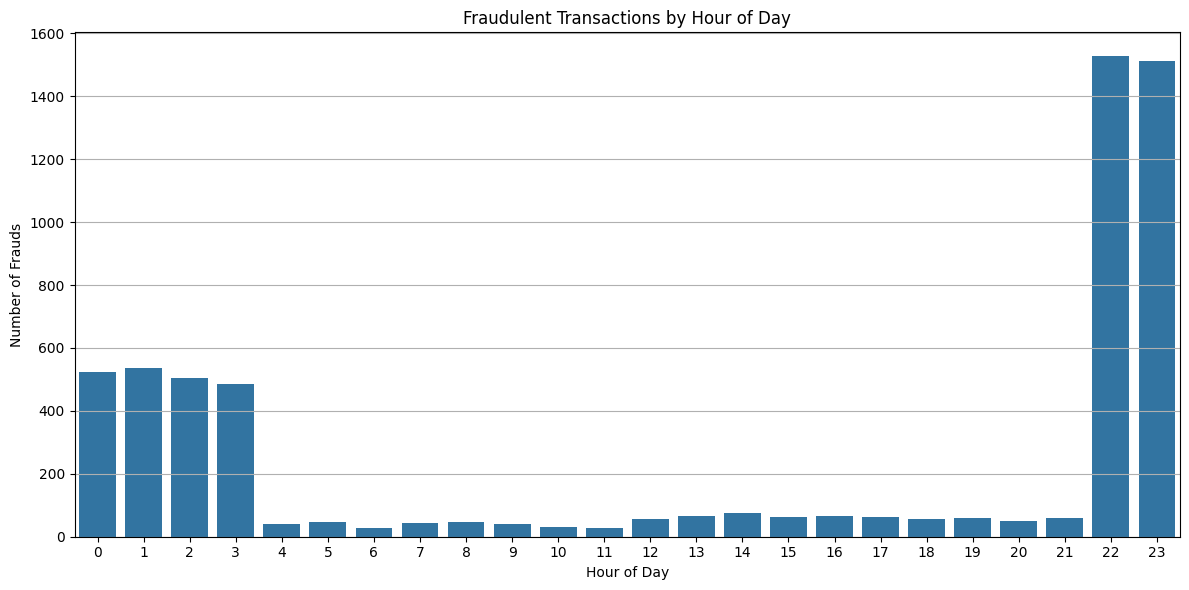

In [ ]:
# Fraud by Hour of Day
plt.figure(figsize=(12, 6))
fraud_only_df.loc[:, 'hour_of_day'] = pd.to_datetime(fraud_only_df['trans_date_trans_time']).dt.hour
sns.countplot(data=fraud_only_df, x='hour_of_day', order=range(24))
plt.title('Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Frauds')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# A2. Frauds by a Day of Week

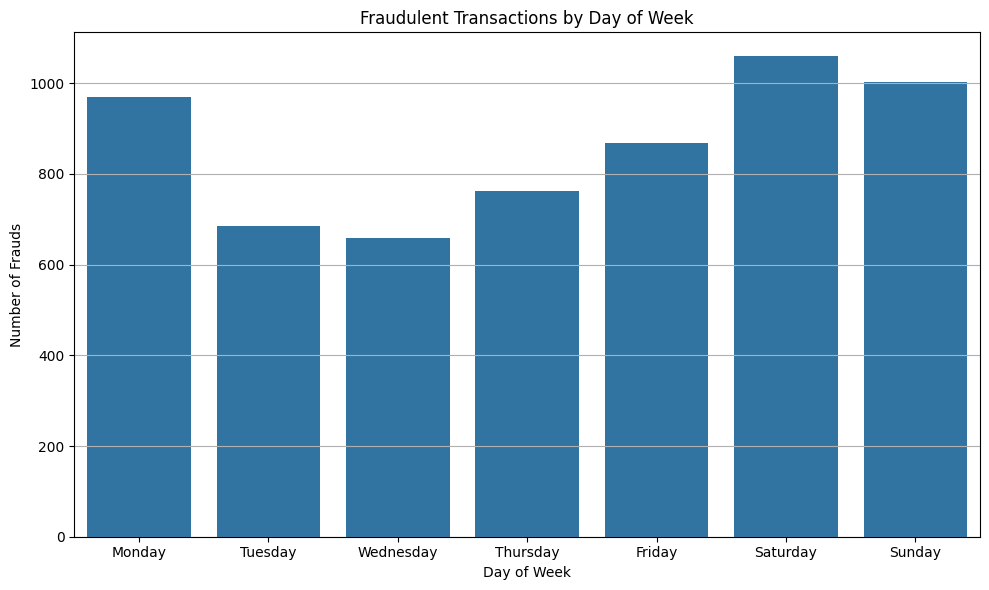

In [ ]:
plt.figure(figsize=(10, 6))
fraud_only_df.loc[:, 'day_of_week']= df['trans_date_trans_time'].dt.day_name()
sns.countplot(data=fraud_only_df, x='day_of_week',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Fraudulent Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Frauds')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# A3. Cross-Reference Day of Week/Hour of a Day

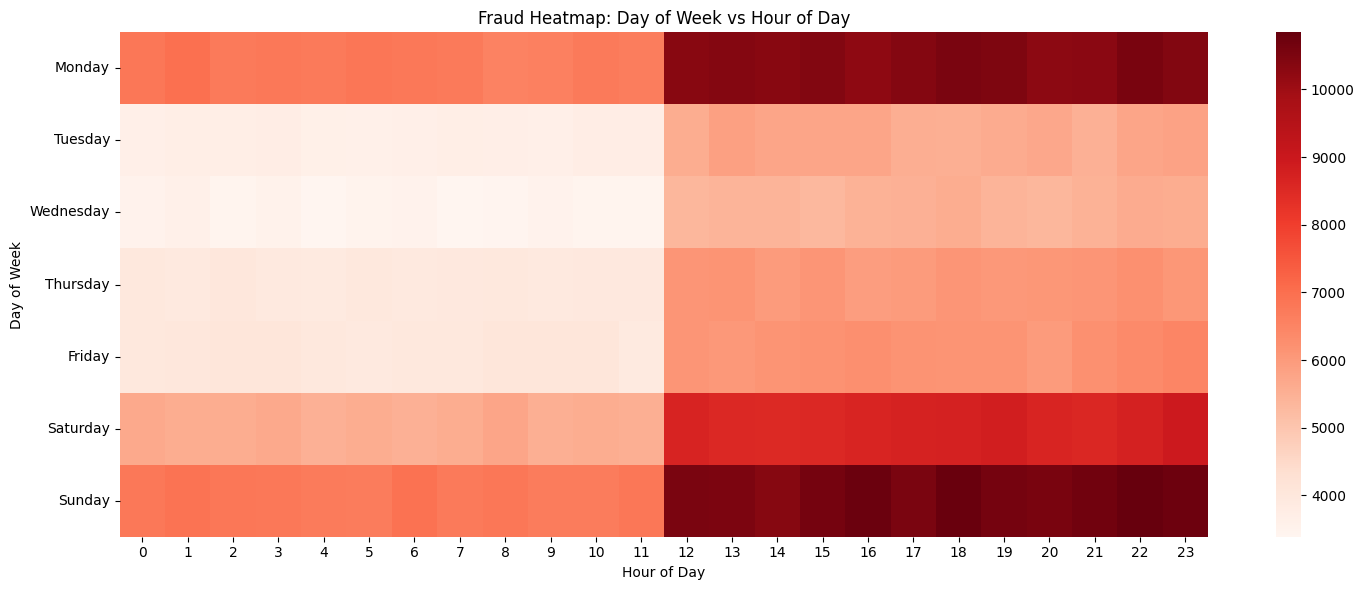

In [ ]:
#Heatmap: Day of Week vs Hour of Day
df['hour_of_day'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()

pivot = df.pivot_table(index='day_of_week', columns='hour_of_day', values='cc_num', aggfunc='count')

# Reorder days for visual clarity
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(ordered_days)

import seaborn as sns
plt.figure(figsize=(15, 6))
sns.heatmap(pivot, cmap='Reds')
plt.title("Fraud Heatmap: Day of Week vs Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()



# Set B. Frauds and Merchants

# B1. Top Merchants attacked by Frauds

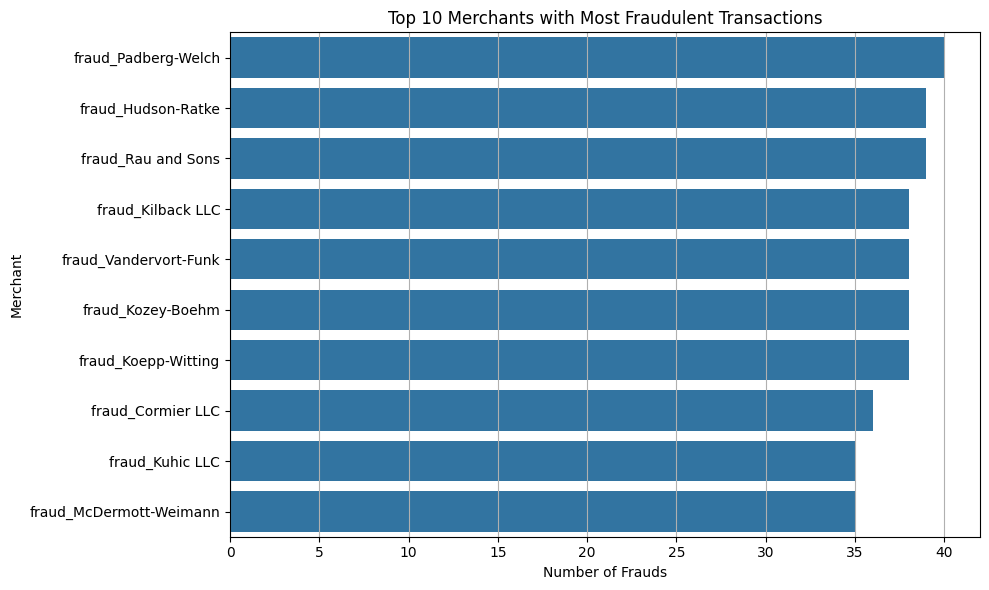

In [ ]:
top_merchants = fraud_only_df['merchant'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_merchants.values, y=top_merchants.index)
plt.title('Top 10 Merchants with Most Fraudulent Transactions')
plt.xlabel('Number of Frauds')
plt.ylabel('Merchant')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

#B2 Fraud Behaviuor

#B2A. Fraud Behaviour -Is Fraud Happening Close to a Real Transaction with the Same Card

In [ ]:
# Get top 10 merchants involved in fraud
top_merchants = df[df['is_fraud'] == 1]['merchant'].value_counts().nlargest(10).index

# Filter dataset to only those merchants
filtered_df = df[df['merchant'].isin(top_merchants)].copy()

# Separate fraud and non-fraud transactions
fraud_df = filtered_df[filtered_df['is_fraud'] == 1]
valid_df = filtered_df[filtered_df['is_fraud'] == 0]

In [ ]:
# Recalculate: time difference = fraud_time - valid_time
def get_signed_time_diff(row, valid_data):
    cc = row['cc_num']
    merchant = row['merchant']
    fraud_time = row['trans_date_trans_time']

    subset = valid_data[(valid_data['cc_num'] == cc) & (valid_data['merchant'] == merchant)]
    if subset.empty:
        return pd.NaT

    # Compute signed time difference (fraud_time - valid_time)
    subset['delta'] = fraud_time - subset['trans_date_trans_time']
    closest_row = subset.iloc[(subset['delta'].abs()).argsort()].iloc[0]
    return closest_row['delta']

# Apply function to get signed timedelta
fraud_df.loc[:,'signed_time_diff'] = fraud_df.apply(lambda row: get_signed_time_diff(row, valid_df), axis=1)

# Convert to hours
fraud_df.loc[:,'hours_diff'] = fraud_df['signed_time_diff'].dt.total_seconds() / 3600



after_df = fraud_df[fraud_df['hours_diff'] > 0].copy()
before_df = fraud_df[fraud_df['hours_diff'] < 0].copy()

print(after_df)



        trans_date_trans_time        cc_num                 merchant  \
721036    2019-11-03 23:04:00  6.049060e+10  fraud_McDermott-Weimann   
722248    2019-11-04 10:27:00  6.049060e+10    fraud_Vandervort-Funk   
1024755   2020-02-28 22:55:00  5.018310e+11        fraud_Kozey-Boehm   
242459    2019-05-01 16:55:00  5.018990e+11          fraud_Kuhic LLC   
88490     2019-02-21 22:29:00  5.738600e+11        fraud_Cormier LLC   
...                       ...           ...                      ...   
489596    2019-08-02 08:24:00  4.477160e+18        fraud_Kilback LLC   
81592     2019-02-18 00:39:00  4.599740e+18        fraud_Kilback LLC   
926294    2020-01-02 03:22:00  4.756040e+18       fraud_Rau and Sons   
1010170   2020-02-20 03:46:00  4.906630e+18  fraud_McDermott-Weimann   
568397    2019-08-30 03:42:00  4.973530e+18      fraud_Koepp-Witting   

               category      amt      first       last gender  \
721036      grocery_pos   300.69      Karen    Johnson      F   
72224

/tmp/ipython-input-3433699322.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df.loc[:,'signed_time_diff'] = fraud_df.apply(lambda row: get_signed_time_diff(row, valid_df), axis=1)
/tmp/ipython-input-3433699322.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df.loc[:,'hours_diff'] = fraud_df['signed_time_diff'].dt.total_seconds() / 3600


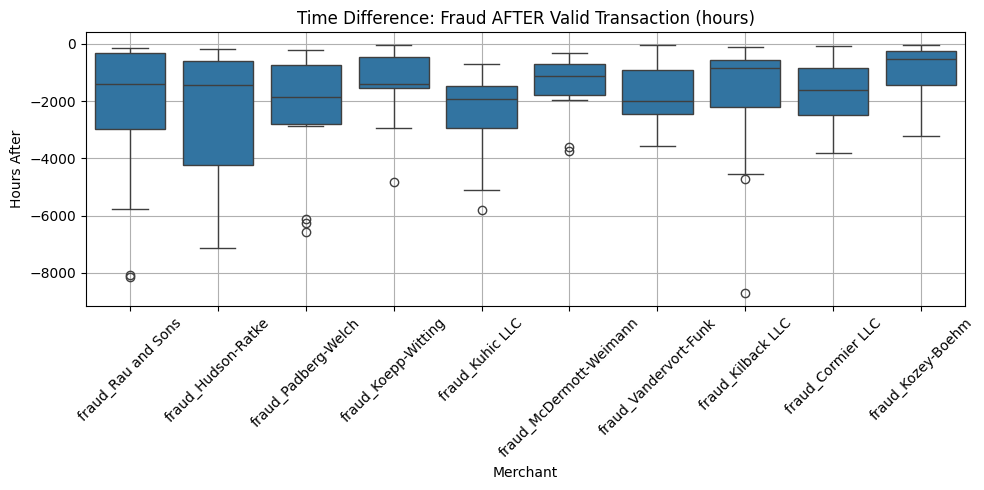

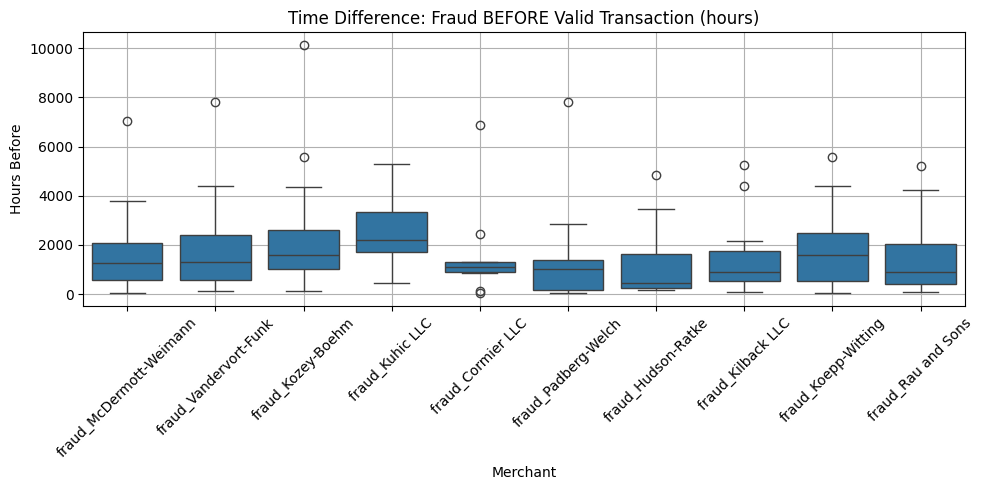

In [ ]:
#Plots

#Plot - after fraud
plt.figure(figsize=(10, 5))
sns.boxplot(data=before_df, x='merchant', y='hours_diff')
plt.title('Time Difference: Fraud AFTER Valid Transaction (hours)')
plt.xlabel('Merchant')
plt.ylabel('Hours After')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#Plot - before fraud
plt.figure(figsize=(10, 5))
sns.boxplot(data=after_df, x='merchant', y='hours_diff')
plt.title('Time Difference: Fraud BEFORE Valid Transaction (hours)')
plt.xlabel('Merchant')
plt.ylabel('Hours Before')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# B2B. Time Gaps Distribution Between Valid/Non-Valid Transactions

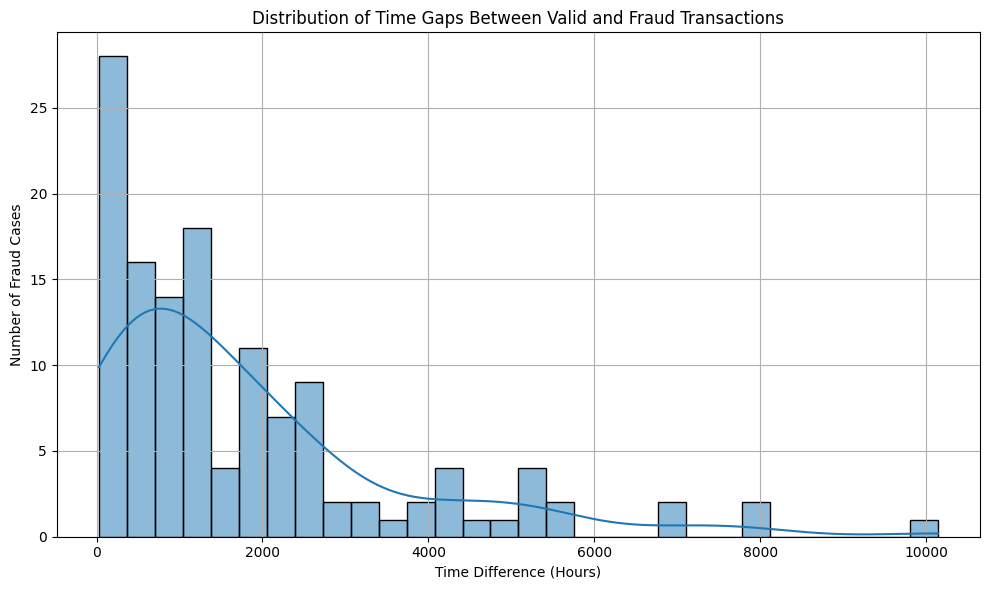

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=after_df, x='hours_diff', bins=30, kde=True)
plt.title("Distribution of Time Gaps Between Valid and Fraud Transactions")
plt.xlabel("Time Difference (Hours)")
plt.ylabel("Number of Fraud Cases")
plt.grid(True)
plt.tight_layout()
plt.show()

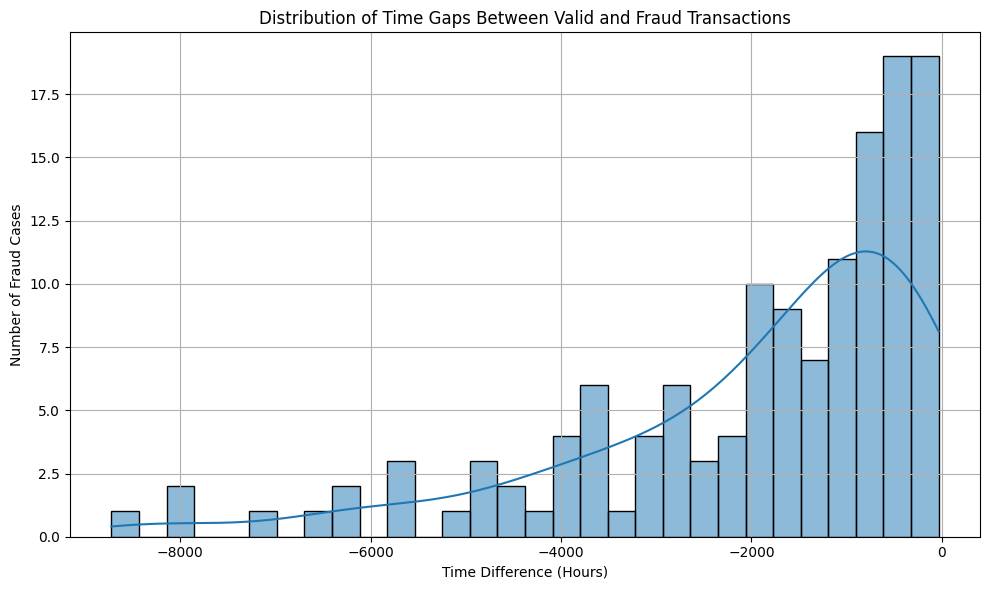

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=before_df, x='hours_diff', bins=30, kde=True)
plt.title("Distribution of Time Gaps Between Valid and Fraud Transactions")
plt.xlabel("Time Difference (Hours)")
plt.ylabel("Number of Fraud Cases")
plt.grid(True)
plt.tight_layout()
plt.show()

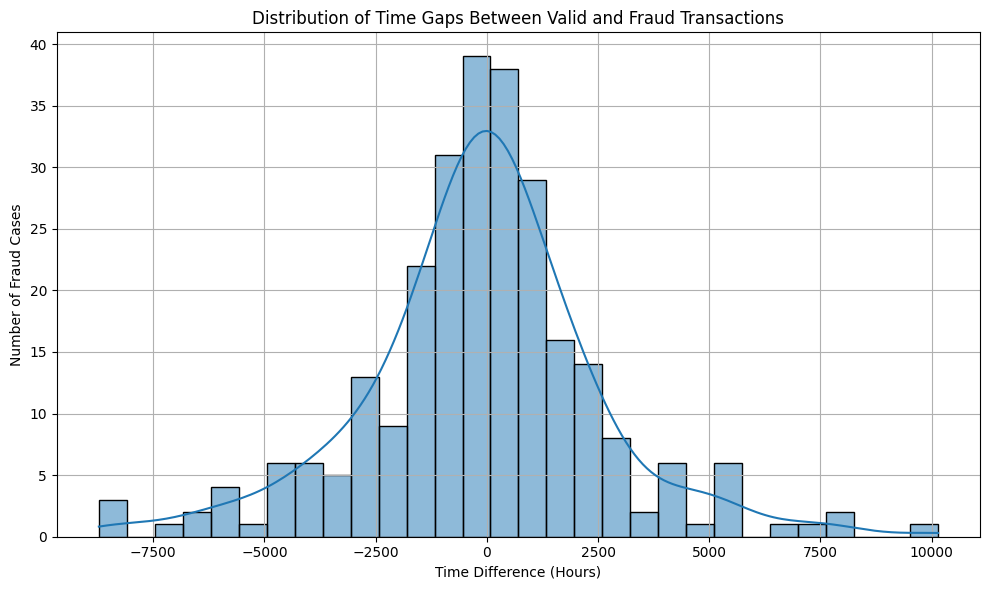

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=fraud_df, x='hours_diff', bins=30, kde=True)
plt.title("Distribution of Time Gaps Between Valid and Fraud Transactions")
plt.xlabel("Time Difference (Hours)")
plt.ylabel("Number of Fraud Cases")
plt.grid(True)
plt.tight_layout()
plt.show()

The histogram shows a normal distribution - no specific attack pattern

#  Set Detective : Merchants non-directly involved in frauds

In [ ]:
stolen_cards = df[df['is_fraud'] == 1]['cc_num'].unique()
only_stolen_cards_df = df[df['cc_num'].isin(stolen_cards)]

# Group by merchant and check if all transactions were non-fraud
safe_merchants = (
    only_stolen_cards_df.groupby('merchant')['is_fraud']
    .sum()
    .reset_index()
)

# Merchants with 0 frauds among stolen cards
only_valid_at_risky_cards = safe_merchants[safe_merchants['is_fraud'] == 0]['merchant']

In [ ]:
# Step 1: Get list of stolen cards
stolen_cards = df[df['is_fraud'] == 1]['cc_num'].unique()

# Step 2: Filter only transactions where stolen cards were used
only_stolen_cards_df = df[df['cc_num'].isin(stolen_cards)]

# Step 3: Sum fraud cases per merchant (for stolen cards only)
merchant_fraud_sum = (
    only_stolen_cards_df.groupby('merchant')['is_fraud'].sum().reset_index()
)

# Step 4: Filter merchants with 0 frauds (i.e., not attacked directly)
indirect_merchants = merchant_fraud_sum[merchant_fraud_sum['is_fraud'] == 0]
print(f"Number of merchants who were not attacked but accepted stolen cards: {len(indirect_merchants)}")

###### Add a category

# Merge in category info for those merchants from the original dataset
categories = df[df['merchant'].isin(indirect_merchants['merchant'])][['merchant', 'category']]

all_categories = (
    categories.groupby('merchant')['category']
    .unique()
    .reset_index()
    .rename(columns={'category': 'all_categories'})
)

# Merge into the merchant list
indirect_merchants_with_all = indirect_merchants.merge(all_categories, on='merchant', how='left')
indirect_merchants_with_all


Number of merchants who were not attacked but accepted stolen cards: 27


,merchant,is_fraud,all_categories
0,fraud_Bahringer-Larson,0,[grocery_net]
1,fraud_Connelly PLC,0,[food_dining]
2,fraud_Dach-Borer,0,[grocery_net]
3,fraud_Fadel Inc,0,[health_fitness]
4,fraud_Funk Group,0,[grocery_net]
5,fraud_Gulgowski LLC,0,[home]
6,fraud_Hills-Olson,0,[grocery_net]
7,"fraud_Hodkiewicz, Prohaska and Paucek",0,[travel]
8,fraud_Johnston-Casper,0,[travel]
9,fraud_Kihn-Schuster,0,[food_dining]


In [ ]:
print("Merchants where only valid purchases were made using stolen cards:")
#print(indirect_merchants['merchant'].tolist())
print(indirect_merchants['merchant'].tolist())

Merchants where only valid purchases were made using stolen cards:
['fraud_Bahringer-Larson', 'fraud_Connelly PLC', 'fraud_Dach-Borer', 'fraud_Fadel Inc', 'fraud_Funk Group', 'fraud_Gulgowski LLC', 'fraud_Hills-Olson', 'fraud_Hodkiewicz, Prohaska and Paucek', 'fraud_Johnston-Casper', 'fraud_Kihn-Schuster', 'fraud_Kohler, Lindgren and Koelpin', 'fraud_Larson, Quitzon and Spencer', 'fraud_McKenzie-Huels', 'fraud_McLaughlin, Armstrong and Koepp', 'fraud_Osinski Inc', 'fraud_Parker, Nolan and Trantow', 'fraud_Paucek-Wiza', 'fraud_Reichert-Weissnat', 'fraud_Ritchie, Bradtke and Stiedemann', 'fraud_Romaguera and Sons', 'fraud_Roob-Okuneva', 'fraud_Schmidt-Larkin', 'fraud_Schroeder Group', 'fraud_Schroeder, Wolff and Hermiston', 'fraud_Torphy-Kertzmann', 'fraud_Wiegand-Lowe', 'fraud_Windler LLC']


In [ ]:
# Count transactions per merchant among stolen cards
tx_counts = only_stolen_cards_df.groupby('merchant').size().reset_index(name='tx_count')

# Join with list of indirect merchants (not attacked)
indirect_merged = indirect_merchants.merge(tx_counts, on='merchant')

# Get top 10 by transaction count
cnt_indirect_merchants = indirect_merged.sort_values(by='tx_count', ascending=False)
print(cnt_indirect_merchants)


                                 merchant  is_fraud  tx_count
5                     fraud_Gulgowski LLC         0      1274
21                   fraud_Schmidt-Larkin         0      1181
26                      fraud_Windler LLC         0      1090
15        fraud_Parker, Nolan and Trantow         0      1022
12                   fraud_McKenzie-Huels         0       940
1                      fraud_Connelly PLC         0       938
14                      fraud_Osinski Inc         0       901
3                         fraud_Fadel Inc         0       896
9                     fraud_Kihn-Schuster         0       884
20                     fraud_Roob-Okuneva         0       855
22                  fraud_Schroeder Group         0       829
24                 fraud_Torphy-Kertzmann         0       826
2                        fraud_Dach-Borer         0       473
10     fraud_Kohler, Lindgren and Koelpin         0       455
16                      fraud_Paucek-Wiza         0       452
25      

/tmp/ipython-input-1469632478.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


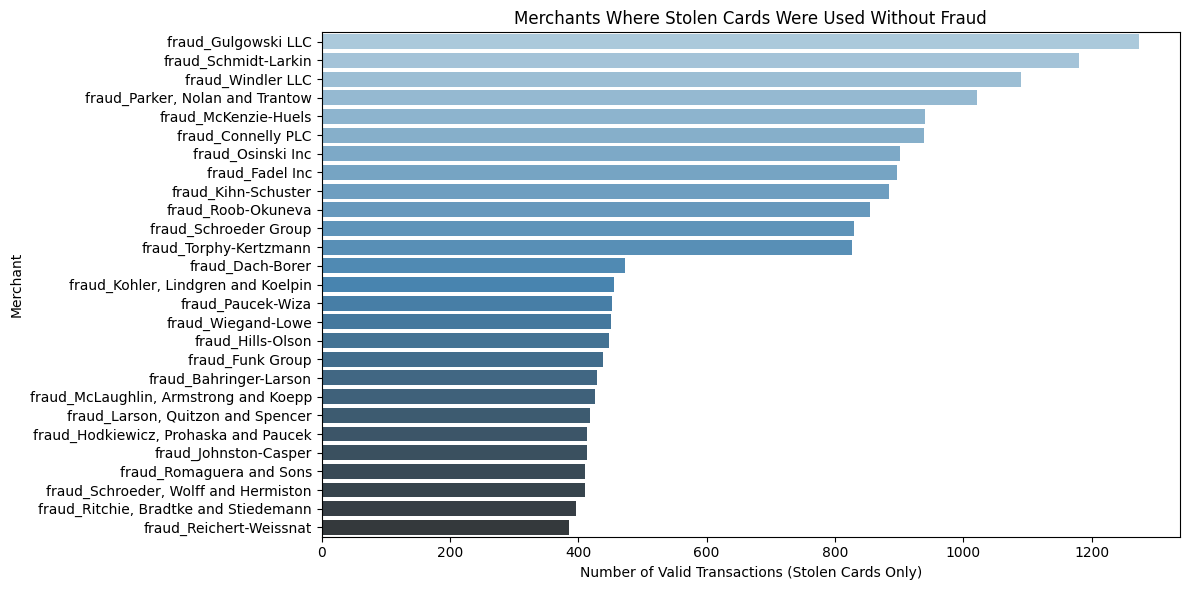

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=cnt_indirect_merchants,
    x='tx_count',
    y='merchant',
    palette='Blues_d'
)
plt.title("Merchants Where Stolen Cards Were Used Without Fraud")
plt.xlabel("Number of Valid Transactions (Stolen Cards Only)")
plt.ylabel("Merchant")
plt.tight_layout()
plt.show()

# Set Detective: Closest Fraud Attack to a non-Directly Involved Merchant


In [ ]:
# Set of merchants that were not attacked
safe_merchants = set(indirect_merchants_with_all['merchant'])

# Filter all fraud transactions
fraud_tx = df[df['is_fraud'] == 1].copy()

# Filter all valid transactions at those merchants
valid_tx_at_safe_merchants = df[(df['is_fraud'] == 0) & (df['merchant'].isin(safe_merchants))].copy()

#Add a category to a next fraud transaction
fraud_category_lookup = df[['category']].copy()
fraud_category_lookup = fraud_category_lookup.rename(columns={'category': 'category_fraud'})



def find_next_valid_tx(row, valid_df):
    cc = row['cc_num']
    fraud_time = row['trans_date_trans_time']

    # Find valid transactions with same card and after the fraud time
    subset = valid_df[
        (valid_df['cc_num'] == cc) &
        (valid_df['trans_date_trans_time'] > fraud_time)
    ]

    if subset.empty:
        return pd.Series([pd.NaT, None, None])

    # Find the one with the smallest time difference
    next_tx = subset.sort_values('trans_date_trans_time').iloc[0]
    time_diff = next_tx['trans_date_trans_time'] - fraud_time

    return pd.Series([next_tx['trans_date_trans_time'], next_tx['merchant'], time_diff])

fraud_tx[['next_valid_time', 'next_merchant', 'time_diff']] = fraud_tx.apply(
lambda row: find_next_valid_tx(row, valid_tx_at_safe_merchants),axis=1)
fraud_with_followups = fraud_tx.dropna(subset=['next_valid_time'])

# Sort by time_diff to see quickest card reuse
fraud_with_followups = fraud_with_followups.sort_values('time_diff')

#Preview
#fraud_with_followups[['cc_num', 'merchant', 'trans_date_trans_time', 'next_merchant', 'next_valid_time', 'time_diff']]

# Make sure we have a time difference in hours
fraud_with_followups['time_diff_hours'] = fraud_with_followups['time_diff'].dt.total_seconds() / 3600

# Keep only those with ≤ 24 hours
fraud_within_24h = fraud_with_followups[fraud_with_followups['time_diff_hours'] <= 24]

#Preview
fraud_within_24h[['cc_num', 'merchant', 'trans_date_trans_time', 'next_merchant', 'next_valid_time', 'time_diff_hours']]



,cc_num,merchant,trans_date_trans_time,next_merchant,next_valid_time,time_diff_hours
28000,6.011370e+15,fraud_O'Keefe-Hudson,2019-01-17 07:46:00,fraud_Dach-Borer,2019-01-17 10:29:00,2.716667
185995,4.681700e+12,fraud_Mohr-Bayer,2019-04-06 23:53:00,fraud_Hills-Olson,2019-04-07 03:21:00,3.466667
765165,3.004430e+13,fraud_Jakubowski Group,2019-11-23 23:35:00,fraud_Wiegand-Lowe,2019-11-24 03:06:00,3.516667
765157,3.004430e+13,fraud_Eichmann-Kilback,2019-11-23 23:32:00,fraud_Wiegand-Lowe,2019-11-24 03:06:00,3.566667
1022140,6.011390e+15,"fraud_Rowe, Batz and Goodwin",2020-02-27 02:15:00,fraud_Wiegand-Lowe,2020-02-27 06:10:00,3.916667
...,...,...,...,...,...,...
278253,3.533800e+15,fraud_Pouros-Haag,2019-05-17 23:37:00,fraud_Connelly PLC,2019-05-18 23:15:00,23.633333
183597,4.681700e+12,fraud_Parisian and Sons,2019-04-06 03:40:00,fraud_Hills-Olson,2019-04-07 03:21:00,23.683333
183589,4.681700e+12,"fraud_Mosciski, Gislason and Mertz",2019-04-06 03:34:00,fraud_Hills-Olson,2019-04-07 03:21:00,23.783333
762863,3.004430e+13,"fraud_Haley, Jewess and Bechtelar",2019-11-23 03:07:00,fraud_Wiegand-Lowe,2019-11-24 03:06:00,23.983333


In [ ]:
print(indirect_merchants_with_all.columns)

Index(['merchant', 'is_fraud', 'all_categories'], dtype='object')


In [ ]:
from datetime import timedelta

fraud_df = df[df['is_fraud'] == 1].copy()

def find_next_fraud(row, fraud_df):
    cc = row['cc_num']
    valid_time = row['trans_date_trans_time']

    # Filter frauds on same card, after valid transaction, within 24h
    subset = fraud_df[
        (fraud_df['cc_num'] == cc) &
        (fraud_df['trans_date_trans_time'] > valid_time + timedelta(hours=0)) &
        (fraud_df['trans_date_trans_time'] <= valid_time + timedelta(hours=24))
    ]

    if subset.empty:
        return pd.Series([pd.NaT, None, None])

    # Get closest fraud
    closest = subset.sort_values('trans_date_trans_time').iloc[0]
    return pd.Series([
        closest['trans_date_trans_time'],
        closest['merchant'],
        closest['category']
    ])

valid_tx_at_safe_merchants[['next_fraud_time', 'next_fraud_merchant', 'next_fraud_category']] = \
valid_tx_at_safe_merchants.apply(lambda row: find_next_fraud(row, fraud_df), axis=1)

valid_tx_at_safe_merchants = valid_tx_at_safe_merchants.dropna(subset=['next_fraud_merchant'])

valid_tx_at_safe_merchants[['cc_num', 'merchant', 'category', 'trans_date_trans_time', 'next_fraud_time','next_fraud_merchant', 'next_fraud_category']]

,cc_num,merchant,category,trans_date_trans_time,next_fraud_time,next_fraud_merchant,next_fraud_category
101488,6.041621e+10,fraud_Gulgowski LLC,home,2019-02-28 14:33:00,2019-03-01 01:32:00,fraud_Marks Inc,gas_transport
264325,6.304520e+11,fraud_Gulgowski LLC,home,2019-05-11 17:51:00,2019-05-12 00:00:00,fraud_Donnelly PLC,misc_net
194837,4.393520e+12,fraud_Schmidt-Larkin,home,2019-04-10 16:22:00,2019-04-11 01:14:00,fraud_Cartwright-Harris,grocery_pos
98927,3.007470e+13,"fraud_Ritchie, Bradtke and Stiedemann",travel,2019-02-27 18:07:00,2019-02-28 00:06:00,fraud_Kiehn Inc,grocery_pos
143016,3.013180e+13,fraud_McKenzie-Huels,food_dining,2019-03-18 12:56:00,2019-03-19 03:16:00,fraud_Wolf Inc,grocery_pos
594259,3.042700e+13,fraud_Paucek-Wiza,grocery_net,2019-09-09 03:14:00,2019-09-10 01:55:00,"fraud_Moen, Reinger and Murphy",grocery_pos
595222,3.051820e+13,fraud_Connelly PLC,food_dining,2019-09-09 12:28:00,2019-09-10 00:08:00,"fraud_Schmeler, Bashirian and Price",shopping_net
597994,3.051820e+13,fraud_McKenzie-Huels,food_dining,2019-09-10 18:20:00,2019-09-10 21:40:00,fraud_Padberg-Sauer,home
187611,3.672140e+13,fraud_Roob-Okuneva,health_fitness,2019-04-07 13:53:00,2019-04-08 00:36:00,fraud_Corwin-Collins,gas_transport
633661,3.805200e+13,fraud_Connelly PLC,food_dining,2019-09-26 22:27:00,2019-09-27 22:03:00,"fraud_Haley, Jewess and Bechtelar",shopping_pos


In [ ]:
len(valid_tx_at_safe_merchants.merchant)

42

# Set C. Training XGBoost and LightGBM

# C1. Prepare extra features: time since previous transactions in seconds, closest transaction (in 1 hour), transactions in 24 hours

In [ ]:
df = df.sort_values(['cc_num', 'trans_date_trans_time'])
df['prev_time'] = df.groupby('cc_num')['trans_date_trans_time'].shift(1)
df['secs_since_prev'] = (df['trans_date_trans_time'] - df['prev_time']).dt.total_seconds().fillna(-1)
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df = df.sort_values(['cc_num','trans_date_trans_time']).reset_index(drop=True)

def add_rolling_counts(g):
    s1 = g.set_index('trans_date_trans_time')['amt'].rolling('1h').count().to_numpy()
    s24 = g.set_index('trans_date_trans_time')['amt'].rolling('24h').count().to_numpy()
    g = g.copy()
    g['tx_count_1h'] = s1
    g['tx_count_24h'] = s24
    return g

df = df.groupby('cc_num', group_keys=False).apply(add_rolling_counts)
df['tx_count_1h'] = df['tx_count_1h'].fillna(0).astype(int)
df['tx_count_24h'] = df['tx_count_24h'].fillna(0).astype(int)


/tmp/ipython-input-526222046.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('cc_num', group_keys=False).apply(add_rolling_counts)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def prepare_features(df, cat_cols, num_cols, fit_encoders=None):
    """
    Prepare a consistent feature matrix for both XGBoost and LightGBM.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe.
    cat_cols : list
        List of categorical columns.
    num_cols : list
        List of numerical/boolean columns.
    fit_encoders : dict or None
        If None, new LabelEncoders will be fitted.
        If dict, must contain fitted encoders for all cat_cols.

    Returns
    -------
    X : pd.DataFrame
        Preprocessed features, same for both XGBoost and LightGBM.
    encoders : dict
        LabelEncoders fitted on categorical columns (for future use).
    """
    df = df.copy()
    encoders = {}

    # Handle categorical columns
    for c in cat_cols:
        if fit_encoders is None:
            le = LabelEncoder()
            df[c] = le.fit_transform(df[c].astype(str))
            encoders[c] = le
        else:
            df[c] = fit_encoders[c].transform(df[c].astype(str))
            encoders[c] = fit_encoders[c]

    # Ensure boolean columns are integers (0/1)
    for c in num_cols:
        if df[c].dtype == "bool":
            df[c] = df[c].astype(int)

    # Build final feature matrix with consistent order
    use_cols = cat_cols + num_cols
    X = df[use_cols].copy()
    return X, encoders


#C2. Training an XGBoost with sample weights

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from xgboost.callback import EarlyStopping

# ---------------------------
# Step 1: Define feature sets
# ---------------------------
cat_cols = ['category', 'job']   # categoricals (label encoded)
num_cols = ['amt', 'isMan', 'isLateEvening', 'city_pop', 'lat', 'long',
            'secs_since_prev', 'tx_count_1h', 'tx_count_24h']  # numerics/booleans

use_cols = cat_cols + num_cols

# ---------------------------
# Step 2: Build X and y
# ---------------------------
X = df[use_cols].copy()
y = df['is_fraud'].copy()

# ---------------------------
# Step 3: Encode categoricals
# ---------------------------
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le   # save encoders if you need them for test set

# ---------------------------
# Step 4: Train/valid/test split
# ---------------------------
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full
)
# → 60% train, 20% valid, 20% test

# ---------------------------
# Step 5: Sample weights (optional)
# ---------------------------
# Weight fraud samples higher to handle imbalance
sample_weights = np.where(y_train == 1, 2.8, 1)

# ---------------------------
# Step 6: Train XGBoost
# ---------------------------
xgb_model = XGBClassifier(
    n_estimators=600,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric=['aucpr']  # 👈  best for imbalance
)

xgb_model.fit(
    X_train, y_train,
    sample_weight=sample_weights,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    #early_stopping_rounds=50,
    #callbacks=[EarlyStopping(rounds=50, save_best=True)],  # 👈 replacement
    verbose=True
)

# ---------------------------
# Step 7: Predictions
# ---------------------------
y_pred = xgb_model.predict(X_valid)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("Confusion Matrix (Validation, 0.50 threshold):")
print(confusion_matrix(y_valid, y_pred))
print("\nClassification Report (Validation):")
print(classification_report(y_valid, y_pred))
print("\nROC-AUC Score (Test):", roc_auc_score(y_test, y_prob))

# ---------------------------
# Step 8: Custom threshold
# ---------------------------
xgb_y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
custom_threshold = 0.52  # example, tune this later

y_pred_thresh = np.where(xgb_y_pred_proba >= custom_threshold, 1, 0)

cm = confusion_matrix(y_test, y_pred_thresh)
print("\nConfusion Matrix (Test, Threshold = {:.2f}):".format(custom_threshold))
print(cm)

report = classification_report(y_test, y_pred_thresh, digits=4)
print("\nClassification Report (Test, Threshold = {:.2f}):\n".format(custom_threshold))
print(report)


[0]	validation_0-aucpr:0.70455	validation_1-aucpr:0.72265


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:52:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[1]	validation_0-aucpr:0.76014	validation_1-aucpr:0.76797
[2]	validation_0-aucpr:0.77797	validation_1-aucpr:0.78700
[3]	validation_0-aucpr:0.78170	validation_1-aucpr:0.79100
[4]	validation_0-aucpr:0.78790	validation_1-aucpr:0.79728
[5]	validation_0-aucpr:0.80001	validation_1-aucpr:0.80694
[6]	validation_0-aucpr:0.80558	validation_1-aucpr:0.81209
[7]	validation_0-aucpr:0.81065	validation_1-aucpr:0.81666
[8]	validation_0-aucpr:0.81434	validation_1-aucpr:0.81975
[9]	validation_0-aucpr:0.81635	validation_1-aucpr:0.82150
[10]	validation_0-aucpr:0.81808	validation_1-aucpr:0.82263
[11]	validation_0-aucpr:0.82050	validation_1-aucpr:0.82460
[12]	validation_0-aucpr:0.82303	validation_1-aucpr:0.82685
[13]	validation_0-aucpr:0.82580	validation_1-aucpr:0.82840
[14]	validation_0-aucpr:0.82928	validation_1-aucpr:0.83129
[15]	validation_0-aucpr:0.83465	validation_1-aucpr:0.83658
[16]	validation_0-aucpr:0.83881	validation_1-aucpr:0.84006
[17]	validation_0-aucpr:0.84041	validation_1-aucpr:0.84192
[18]	v

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from xgboost.callback import EarlyStopping

# ---------------------------
# Step 1: Define feature sets
# ---------------------------
cat_cols = ['category', 'job']   # categoricals (label encoded)
num_cols = ['amt', 'isMan', 'isLateEvening', 'city_pop', 'lat', 'long',
            'secs_since_prev', 'tx_count_1h', 'tx_count_24h']  # numerics/booleans

use_cols = cat_cols + num_cols

# ---------------------------
# Step 2: Build X and y
# ---------------------------
X = df[use_cols].copy()
y = df['is_fraud'].copy()

# ---------------------------
# Step 3: Encode categoricals
# ---------------------------
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le   # save encoders if you need them for test set

# ---------------------------
# Step 4: Train/valid/test split
# ---------------------------
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full
)
# → 60% train, 20% valid, 20% test

# ---------------------------
# Step 5: Sample weights (optional)
# ---------------------------
# Weight fraud samples higher to handle imbalance
sample_weights = np.where(y_train == 1, 2.8, 1)

# ---------------------------
# Step 6: Train XGBoost
# ---------------------------
xgb_model = XGBClassifier(
    n_estimators=600,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric=['aucpr']  # 👈  best for imbalance
)

xgb_model.fit(
    X_train, y_train,
    sample_weight=sample_weights,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    #early_stopping_rounds=50,
    #callbacks=[EarlyStopping(rounds=50, save_best=True)],  # 👈 replacement
    verbose=True
)

# ---------------------------
# Step 7: Predictions
# ---------------------------
y_pred = xgb_model.predict(X_valid)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("Confusion Matrix (Validation, 0.50 threshold):")
print(confusion_matrix(y_valid, y_pred))
print("\nClassification Report (Validation):")
print(classification_report(y_valid, y_pred))
print("\nROC-AUC Score (Test):", roc_auc_score(y_test, y_prob))

# ---------------------------
# Step 8: Custom threshold
# ---------------------------
xgb_y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
custom_threshold = 0.52  # example, tune this later

y_pred_thresh = np.where(xgb_y_pred_proba >= custom_threshold, 1, 0)

cm = confusion_matrix(y_test, y_pred_thresh)
print("\nConfusion Matrix (Test, Threshold = {:.2f}):".format(custom_threshold))
print(cm)

report = classification_report(y_test, y_pred_thresh, digits=4)
print("\nClassification Report (Test, Threshold = {:.2f}):\n".format(custom_threshold))
print(report)


[0]	validation_0-aucpr:0.70455	validation_1-aucpr:0.72265


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:57:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[1]	validation_0-aucpr:0.76014	validation_1-aucpr:0.76797
[2]	validation_0-aucpr:0.77797	validation_1-aucpr:0.78700
[3]	validation_0-aucpr:0.78170	validation_1-aucpr:0.79100
[4]	validation_0-aucpr:0.78790	validation_1-aucpr:0.79728
[5]	validation_0-aucpr:0.80001	validation_1-aucpr:0.80694
[6]	validation_0-aucpr:0.80558	validation_1-aucpr:0.81209
[7]	validation_0-aucpr:0.81065	validation_1-aucpr:0.81666
[8]	validation_0-aucpr:0.81434	validation_1-aucpr:0.81975
[9]	validation_0-aucpr:0.81635	validation_1-aucpr:0.82150
[10]	validation_0-aucpr:0.81808	validation_1-aucpr:0.82263
[11]	validation_0-aucpr:0.82050	validation_1-aucpr:0.82460
[12]	validation_0-aucpr:0.82303	validation_1-aucpr:0.82685
[13]	validation_0-aucpr:0.82580	validation_1-aucpr:0.82840
[14]	validation_0-aucpr:0.82928	validation_1-aucpr:0.83129
[15]	validation_0-aucpr:0.83465	validation_1-aucpr:0.83658
[16]	validation_0-aucpr:0.83881	validation_1-aucpr:0.84006
[17]	validation_0-aucpr:0.84041	validation_1-aucpr:0.84192
[18]	v

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))

xgb_y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (fraud)

custom_threshold = 0.52 #F1-Score = 0.7882
#custom_threshold = 0.51 #F1-Score = 0.7884
#custom_threshold = 0.50 #F1-Score = 0.7880
#custom_threshold = 0.49 #F1-Score = 0.7857
#custom_threshold = 0.485 #F1-Score = 0.7766
#custom_threshold = 0.48 #F1-Score = 0.7759
#custom_threshold = 0.47 #F1-Score = 0.7882

y_pred_thresh = np.where(xgb_y_pred_proba >= custom_threshold, 1, 0)

# Now calculate confusion matrix again with the new threshold
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_thresh)
print(cm)
report = classification_report(y_test, y_pred_thresh, digits=4)
print("Classification Report (Threshold = {:.2f}):\n".format(custom_threshold))
print(report)

Confusion Matrix:
[[208355    159]
 [   248    953]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208514
           1       0.86      0.79      0.82      1201

    accuracy                           1.00    209715
   macro avg       0.93      0.90      0.91    209715
weighted avg       1.00      1.00      1.00    209715


ROC-AUC Score: 0.9972955649363785
[[208356    158]
 [   259    942]]
Classification Report (Threshold = 0.52):

              precision    recall  f1-score   support

           0     0.9988    0.9992    0.9990    208514
           1     0.8564    0.7843    0.8188      1201

    accuracy                         0.9980    209715
   macro avg     0.9276    0.8918    0.9089    209715
weighted avg     0.9979    0.9980    0.9980    209715



ROC AUC Score: 0.9973


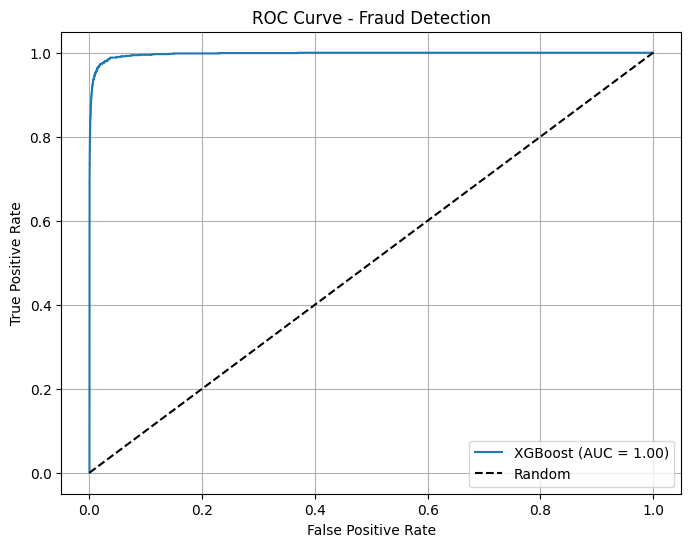

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve

# 2. Get predicted probabilities (not just labels)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (fraud)



# 3. Calculate ROC AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {auc:.4f}")

# 4. Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Fraud Detection")
plt.legend()
plt.grid()
plt.show()



In [ ]:
from sklearn.metrics import f1_score
import numpy as np

# Make sure thresholds is an array, not a float
threshold_grid = np.arange(0.0, 1.0, 0.01)
f1_scores = []

for t in threshold_grid:
    y_pred_thresh = (xgb_y_pred_proba >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))

f1_scores = np.array(f1_scores)

best_idx = np.argmax(f1_scores)
best_threshold = threshold_grid[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best threshold: {best_threshold:.2f}")
print(f"Best F1 score: {best_f1:.4f}")


Best threshold: 0.58
Best F1 score: 0.8226


In [ ]:
#XGB-improved

import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# ---------------------------
# Step 1: Define feature sets
# ---------------------------
cat_cols = ['category', 'job']   # categoricals (label encoded)
num_cols = ['amt', 'isMan', 'isLateEvening', 'city_pop', 'lat', 'long',
            'secs_since_prev', 'tx_count_1h', 'tx_count_24h']  # numerics/booleans

use_cols = cat_cols + num_cols

# ---------------------------
# Step 2: Build X and y
# ---------------------------
X = df[use_cols].copy()
y = df['is_fraud'].copy()

# ---------------------------
# Step 3: Encode categoricals
# ---------------------------
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le   # save encoders if you need them for test set

# ---------------------------
# Step 4: Train/valid/test split
# ---------------------------
X_train_full, imp_X_test, imp_y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full
)
# → 60% train, 20% valid, 20% test

# ---------------------------
# Step 5: Sample weights (optional)
# ---------------------------
# Weight fraud samples higher to handle imbalance
sample_weights = np.where(y_train == 1, 2.8, 1)

# ---------------------------
# Step 6: Train XGBoost
# ---------------------------
imp_xgb_model = XGBClassifier(
    n_estimators=600,
    learning_rate=0.1,
    #learning_rate=0.08,
    max_depth=6,
    #min_child_weight=15,
    min_child_weight=10,
    reg_alpha=2.0,
    reg_lambda=10.0,
    random_state=42,
    use_label_encoder=False,
    eval_metric=['aucpr']  # 👈  best for imbalance
)

imp_xgb_model.fit(
    X_train, y_train,
    sample_weight=sample_weights,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    #early_stopping_rounds=50,
    verbose=True
)

# ---------------------------
# Step 7: Predictions
# ---------------------------
imp_y_pred = imp_xgb_model.predict(X_valid)
imp_y_prob = imp_xgb_model.predict_proba(X_test)[:, 1]

print("Confusion Matrix (Validation, 0.50 threshold):")
print(confusion_matrix(y_valid, imp_y_pred))
print("\nClassification Report (Validation):")
print(classification_report(y_valid, imp_y_pred))
print("\nROC-AUC Score (Test):", roc_auc_score(y_test, imp_y_prob))

# ---------------------------
# Step 8: Custom threshold
# ---------------------------
imp_xgb_y_pred_proba = imp_xgb_model.predict_proba(X_test)[:, 1]
custom_threshold = 0.52  # example, tune this later

imp_y_pred_thresh = np.where(xgb_y_pred_proba >= custom_threshold, 1, 0)

cm = confusion_matrix(y_test, imp_y_pred_thresh)
print("\nConfusion Matrix (Test, Threshold = {:.2f}):".format(custom_threshold))
print(cm)

report = classification_report(y_test, y_pred_thresh, digits=4)
print("\nClassification Report (Test, Threshold = {:.2f}):\n".format(custom_threshold))
print(report)


[0]	validation_0-aucpr:0.68303	validation_1-aucpr:0.69975


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:55:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[1]	validation_0-aucpr:0.74219	validation_1-aucpr:0.75403
[2]	validation_0-aucpr:0.75827	validation_1-aucpr:0.76883
[3]	validation_0-aucpr:0.76776	validation_1-aucpr:0.77798
[4]	validation_0-aucpr:0.77353	validation_1-aucpr:0.78297
[5]	validation_0-aucpr:0.78778	validation_1-aucpr:0.79837
[6]	validation_0-aucpr:0.79404	validation_1-aucpr:0.80378
[7]	validation_0-aucpr:0.79858	validation_1-aucpr:0.80749
[8]	validation_0-aucpr:0.80232	validation_1-aucpr:0.81279
[9]	validation_0-aucpr:0.80634	validation_1-aucpr:0.81675
[10]	validation_0-aucpr:0.80959	validation_1-aucpr:0.81969
[11]	validation_0-aucpr:0.81597	validation_1-aucpr:0.82421
[12]	validation_0-aucpr:0.81836	validation_1-aucpr:0.82688
[13]	validation_0-aucpr:0.82250	validation_1-aucpr:0.83008
[14]	validation_0-aucpr:0.82567	validation_1-aucpr:0.83323
[15]	validation_0-aucpr:0.82805	validation_1-aucpr:0.83567
[16]	validation_0-aucpr:0.83035	validation_1-aucpr:0.83793
[17]	validation_0-aucpr:0.83350	validation_1-aucpr:0.83991
[18]	v

In [ ]:
imp_y_pred_thresh = (imp_xgb_y_pred_proba >= 0.5).astype(int)
print(confusion_matrix(y_test, imp_y_pred_thresh, labels=[0,1]))

[[208306    208]
 [   233    968]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def evaluate_thresholds(y_true, y_proba, thresholds,
                        avg_txn_value=100, fraud_txn_cost=191, fraud_multiplier=4.61):
    """
    Build a business-friendly evaluation table for fraud detection thresholds.

    Parameters:
    ----------
    y_true : array-like
        True labels (0 = legit, 1 = fraud).
    y_proba : array-like
        Predicted probabilities for fraud.
    thresholds : list
        List of thresholds to evaluate.
    avg_txn_value : float
        Average legitimate transaction value (used for false alarm cost).
    fraud_txn_cost : float
        Average direct cost of a fraudulent transaction.
    fraud_multiplier : float
        Multiplier for indirect fraud costs (chargebacks, ops, reputation).

    Returns:
    -------
    DataFrame with metrics and business cost estimates.
    """
    results = []

    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()

        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        # Business-friendly metrics
        fraud_pct_found = recall * 100
        missed_frauds = fn
        false_alarms = fp

        missed_fraud_cost = missed_frauds * fraud_txn_cost * fraud_multiplier
        false_alarm_cost = false_alarms * avg_txn_value
        total_loss = missed_fraud_cost + false_alarm_cost

        results.append({
            "Threshold": round(t, 3),
            "Fraud % Found (Recall)": f"{fraud_pct_found:.2f}%",
            "Precision (Fraud Alerts Correct)": f"{precision*100:.2f}%",
            "F1 Score": f"{f1:.2f}",
            "Missed Frauds": missed_frauds,
            "Missed Fraud Cost ($)": f"{missed_fraud_cost:,.0f}",
            "False Alarms": false_alarms,
            "False Alarm Cost ($)": f"{false_alarm_cost:,.0f}",
            "Total Estimated Loss ($)": f"{total_loss:,.0f}"
        })

    return pd.DataFrame(results)

# Example usage:
thresholds_to_check = [0.1, 0.2, 0.3, 0.4, 0.50, 0.58, 0.60, 0.70, 0.85]  # add best_threshold or constrained_threshold too
df_eval = evaluate_thresholds(y_test, imp_xgb_y_pred_proba, thresholds_to_check)

print("\n📊 Business-Friendly Fraud Detection Table")
print(df_eval.to_string(index=False))



📊 Business-Friendly Fraud Detection Table
 Threshold Fraud % Found (Recall) Precision (Fraud Alerts Correct) F1 Score  Missed Frauds Missed Fraud Cost ($)  False Alarms False Alarm Cost ($) Total Estimated Loss ($)
      0.10                 91.59%                           52.46%     0.67            101                88,932           997               99,700                  188,632
      0.20                 88.34%                           64.38%     0.74            140               123,271           587               58,700                  181,971
      0.30                 85.01%                           71.75%     0.78            180               158,492           402               40,200                  198,692
      0.40                 82.18%                           77.47%     0.80            214               188,429           287               28,700                  217,129
      0.50                 80.60%                           82.31%     0.81            233  

In [ ]:
import joblib
joblib.dump(xgb_model, "fraud_xgb_model.pkl")

['fraud_xgb_model.pkl']

In [ ]:
import json
with open("best_threshold.json", "w") as f:
    json.dump({"threshold": 0.58}, f)

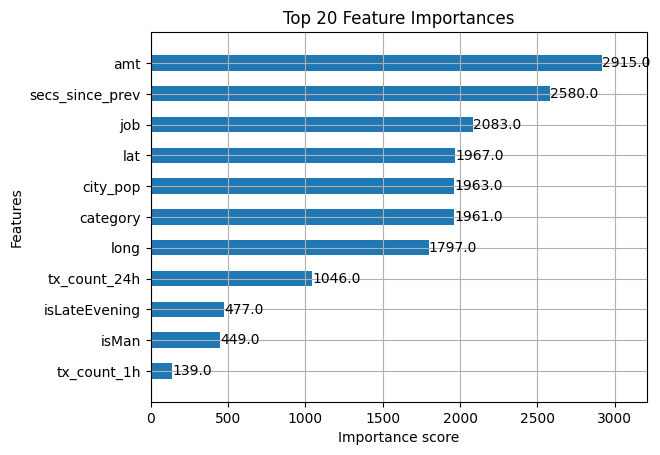

In [ ]:
import xgboost as xgb
xgb.plot_importance(imp_xgb_model, max_num_features=20, importance_type='weight', height=0.5)
plt.title('Top 20 Feature Importances')
plt.show()

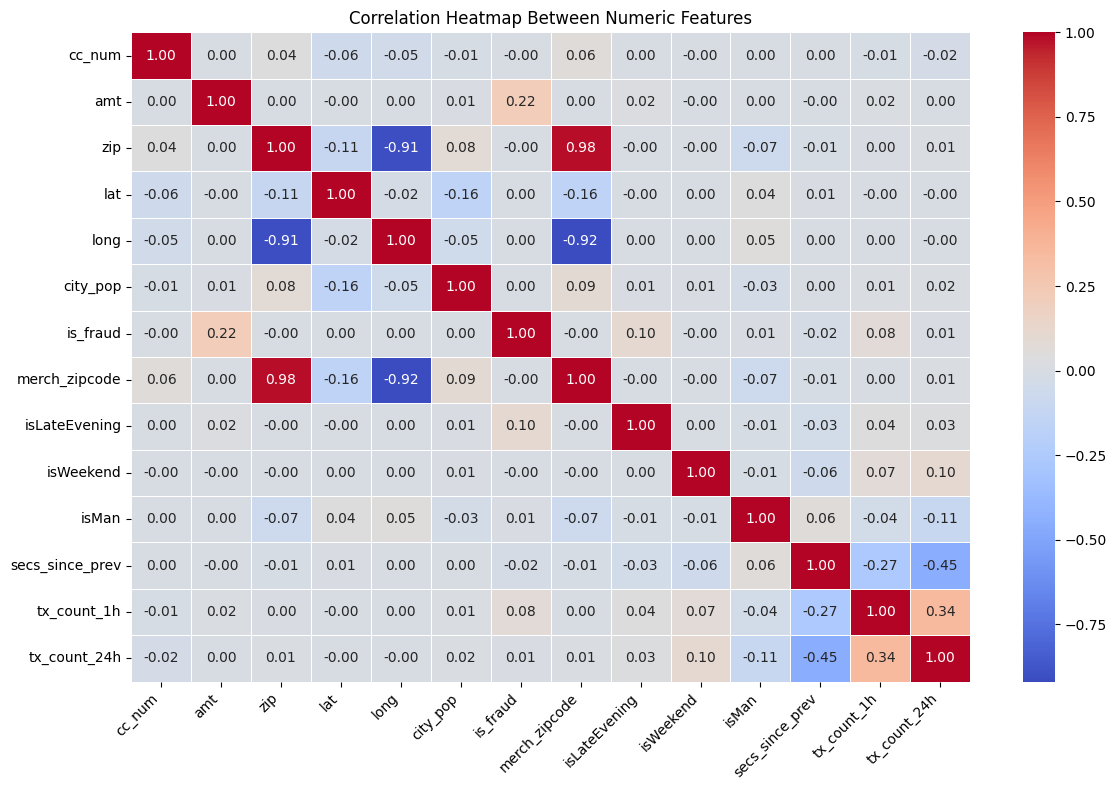

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numeric features
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Optional: If your label column 'is_fraud' is included, keep it for analysis
# Remove if you only want to explore feature correlations
# numeric_df = numeric_df.drop(columns=['is_fraud'])

# Step 2: Compute correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap Between Numeric Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import joblib
joblib.dump(xgb_model, "fraud_xgb_model.pkl")

['fraud_xgb_model.pkl']

In [ ]:
df.columns

NameError: name 'df' is not defined

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split


# ---------------------------
# Step 1: Define feature sets
# ---------------------------
cat_cols = ['category', 'job']   # categoricals (label encoded)
num_cols = ['amt', 'isMan', 'isLateEvening', 'city_pop', 'lat', 'long',
            'secs_since_prev', 'tx_count_1h', 'tx_count_24h']  # numerics/booleans

use_cols = cat_cols + num_cols

# ---------------------------
# Step 2: Build X and y
# ---------------------------
X = df[use_cols].copy()
y = df['is_fraud'].copy()

# ---------------------------
# Step 3: Encode categoricals
# ---------------------------
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le   # save encoders if you need them for test set


# 4) Split (keep DataFrames, not NumPy)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# C3. Training LightGBM to compare with XGBoost

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# 1) Define your columns
cat_cols = ['category', 'job']   # categoricals (label encoded)
num_cols = ['amt', 'isMan', 'isLateEvening', 'city_pop', 'lat', 'long',
            'secs_since_prev', 'tx_count_1h', 'tx_count_24h']  # numerics/booleans

use_cols = cat_cols + num_cols

# 2) Build X and y
X = df[use_cols].copy()
y = df['is_fraud'].copy()


# ---------------------------
# Step 3: Encode categoricals
# ---------------------------
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le   # save encoders if you need them for test set


# 4) Train/valid split
lgbm_X_train, lgbm_X_valid, lgbm_y_train, lgbm_y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5) Define model
clf = LGBMClassifier(
    n_estimators=5000,       # large, rely on early stopping
    learning_rate=0.03,
    num_leaves=80,
    min_child_samples=110,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=2.0,
    reg_lambda=10.0,
    scale_pos_weight=173, #from previous best performance - (208,514 - 1201) / 1201
    #is_unbalance=True,
    objective="binary",
    metric="auc",
    verbose=-1
)

# 6) Train model with early stopping
clf.fit(
    lgbm_X_train, lgbm_y_train,
    eval_set=[(lgbm_X_valid, lgbm_y_valid)],
    eval_metric="auc",  # 👈 focus on PR-AUC for imbalanced data
    callbacks=[early_stopping(100), log_evaluation(100)]

)

# 7) Predictions on validation set
lgbm_y_pred_prob = clf.predict_proba(lgbm_X_valid)[:, 1]
lgbm_y_pred = (lgbm_y_pred_prob > 0.5).astype(int)

print(confusion_matrix(lgbm_y_valid, lgbm_y_pred))
print(classification_report(lgbm_y_valid, lgbm_y_pred))


Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.995887
[200]	valid_0's auc: 0.996872
[300]	valid_0's auc: 0.997353
[400]	valid_0's auc: 0.997511
[500]	valid_0's auc: 0.997567
[600]	valid_0's auc: 0.997586
[700]	valid_0's auc: 0.997589
Early stopping, best iteration is:
[650]	valid_0's auc: 0.997603
[[207316   1198]
 [    87   1114]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    208514
           1       0.48      0.93      0.63      1201

    accuracy                           0.99    209715
   macro avg       0.74      0.96      0.82    209715
weighted avg       1.00      0.99      0.99    209715




=== LightGBM: Best F1 Threshold ===
Threshold    0.900000
F1           0.774685
Precision    0.714487
Recall       0.845962
Name: 16, dtype: float64

=== LightGBM: Lowest Cost Threshold ===
Threshold                        0.80
Total Estimated Loss ($)    180329.87
Missed Frauds                  137.00
False Alarms                   597.00
Name: 14, dtype: float64

=== LightGBM: Key Metrics by Threshold ===
 Threshold  Recall  Precision     F1
    0.1000  0.9684     0.2717 0.4244
    0.1500  0.9592     0.3106 0.4692
    0.2000  0.9542     0.3450 0.5067
    0.2500  0.9459     0.3699 0.5318
    0.3000  0.9442     0.3951 0.5571
    0.3500  0.9384     0.4168 0.5772
    0.4000  0.9351     0.4376 0.5962
    0.4500  0.9309     0.4608 0.6165
    0.5000  0.9276     0.4818 0.6342
    0.5500  0.9192     0.4998 0.6475
    0.6000  0.9176     0.5203 0.6641
    0.6500  0.9101     0.5465 0.6829
    0.7000  0.9017     0.5739 0.7014
    0.7500  0.8926     0.6022 0.7192
    0.8000  0.8859     0.6406 0.7

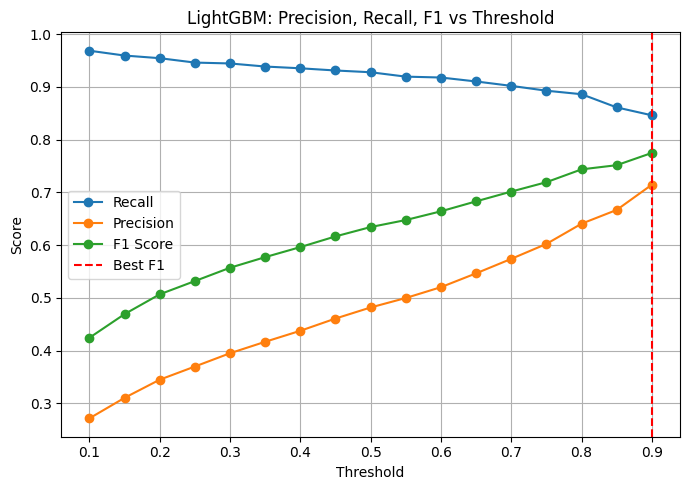

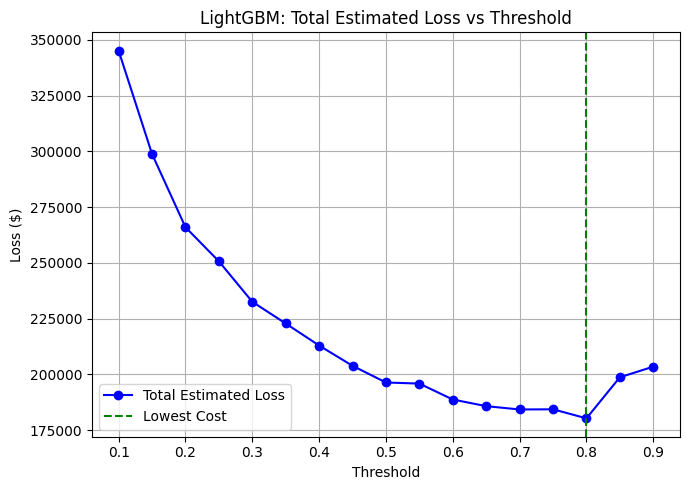

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# --- Evaluation function ---
def evaluate_thresholds(y_true, y_proba, thresholds,
                        avg_txn_value=100, fraud_txn_cost=191, fraud_multiplier=4.61):
    rows = []
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()

        precision = precision_score(y_true, y_pred, zero_division=0)
        recall    = recall_score(y_true, y_pred, zero_division=0)
        f1        = f1_score(y_true, y_pred, zero_division=0)

        missed_fraud_cost = fn * fraud_txn_cost * fraud_multiplier  # $191 × 4.61 ≈ $880
        false_alarm_cost  = fp * avg_txn_value                      # $100 per false alarm
        total_loss        = missed_fraud_cost + false_alarm_cost

        rows.append({
            "Threshold": round(t, 3),
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "TN": tn, "FP": fp, "FN": fn, "TP": tp,
            "Missed Frauds": fn,
            "Missed Fraud Cost ($191 × 4.61)": missed_fraud_cost,
            "False Alarms": fp,
            "False Alarm Cost ($100 each)": false_alarm_cost,
            "Total Estimated Loss ($)": total_loss
        })
    return pd.DataFrame(rows)

# --- Run evaluation on TEST set ---
y_test_proba = clf.predict_proba(X_test)[:,1]

thresholds = np.arange(0.10, 0.91, 0.05)
df_lgb_eval = evaluate_thresholds(y_test, y_test_proba, thresholds)

# --- Identify best F1 and lowest cost thresholds ---
best_f1_idx   = df_lgb_eval['F1'].idxmax()
best_cost_idx = df_lgb_eval['Total Estimated Loss ($)'].idxmin()

print("\n=== LightGBM: Best F1 Threshold ===")
print(df_lgb_eval.loc[best_f1_idx, ['Threshold','F1','Precision','Recall']])

print("\n=== LightGBM: Lowest Cost Threshold ===")
print(df_lgb_eval.loc[best_cost_idx, ['Threshold','Total Estimated Loss ($)','Missed Frauds','False Alarms']])

# --- Two clean tables ---
metrics_table = df_lgb_eval[['Threshold','Recall','Precision','F1']]
costs_table   = df_lgb_eval[['Threshold','Missed Frauds','Missed Fraud Cost ($191 × 4.61)',
                             'False Alarms','False Alarm Cost ($100 each)','Total Estimated Loss ($)']]

pd.set_option("display.float_format", "{:.4f}".format)
print("\n=== LightGBM: Key Metrics by Threshold ===")
print(metrics_table.to_string(index=False))
print("\n=== LightGBM: Business Impact by Threshold ===")
print(costs_table.to_string(index=False))

# --- Plots ---
plt.figure(figsize=(7,5))
plt.plot(df_lgb_eval["Threshold"], df_lgb_eval["Recall"], marker="o", label="Recall")
plt.plot(df_lgb_eval["Threshold"], df_lgb_eval["Precision"], marker="o", label="Precision")
plt.plot(df_lgb_eval["Threshold"], df_lgb_eval["F1"], marker="o", label="F1 Score")
plt.axvline(df_lgb_eval.loc[best_f1_idx,'Threshold'], color='red', linestyle='--', label='Best F1')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("LightGBM: Precision, Recall, F1 vs Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(df_lgb_eval["Threshold"], df_lgb_eval["Total Estimated Loss ($)"],
         marker="o", color="blue", label="Total Estimated Loss")
plt.axvline(df_lgb_eval.loc[best_cost_idx,'Threshold'], color='green', linestyle='--', label='Lowest Cost')
plt.xlabel("Threshold")
plt.ylabel("Loss ($)")
plt.title("LightGBM: Total Estimated Loss vs Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# C4. Ensembling both XGBoost amd LightGBM

In [ ]:
# --- 1. Get probabilities from both models ---
#xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
imp_xgb_probs = imp_xgb_model.predict_proba(X_test)[:, 1]
lgb_probs = clf.predict_proba(X_test)[:, 1]   # assuming clf is your final LightGBM

# --- 2. Ensemble probabilities (simple average) ---
#ensemble_probs = (xgb_probs + lgb_probs) / 2
ensemble_probs = (imp_xgb_probs + lgb_probs) / 2

# --- 3. Evaluate thresholds ---
thresholds = np.arange(0.10, 0.91, 0.05)

df_ens_eval = evaluate_thresholds(y_test, ensemble_probs, thresholds)

# --- 4. Identify best F1 and lowest cost ---
best_f1_idx   = df_ens_eval['F1 Score'].idxmax()
best_cost_idx = df_ens_eval['Total Estimated Loss ($)'].idxmin()

print("\n=== Ensemble: Best F1 ===")
print(df_ens_eval.loc[best_f1_idx, ['Threshold','F1 Score','Precision (Fraud Alerts Correct)','Fraud % Found (Recall)']])

print("\n=== Ensemble: Lowest Cost ===")
print(df_ens_eval.loc[best_cost_idx,
    ['Threshold','Total Estimated Loss ($)','Missed Frauds','False Alarms']])

# --- 5. Show summary tables ---
metrics_table = df_ens_eval[['Threshold','Fraud % Found (Recall)','Precision (Fraud Alerts Correct)','F1 Score']]
costs_table   = df_ens_eval[['Threshold','Missed Frauds',
                             'Missed Fraud Cost ($)',
                             'False Alarms','False Alarm Cost ($)',
                             'Total Estimated Loss ($)']]

pd.set_option("display.float_format", "{:.4f}".format)

print("\n=== Ensemble: Key Metrics by Threshold ===")
print(metrics_table.to_string(index=False))

print("\n=== Ensemble: Business Impact by Threshold ===")
print(costs_table.to_string(index=False))



=== Ensemble: Best F1 ===
Threshold                             0.75
F1 Score                              0.82
Precision (Fraud Alerts Correct)    85.70%
Fraud % Found (Recall)              78.85%
Name: 13, dtype: object

=== Ensemble: Lowest Cost ===
Threshold                      0.45
Total Estimated Loss ($)    178,303
Missed Frauds                   123
False Alarms                    700
Name: 7, dtype: object

=== Ensemble: Key Metrics by Threshold ===
 Threshold Fraud % Found (Recall) Precision (Fraud Alerts Correct) F1 Score
    0.1000                 96.17%                           32.59%     0.49
    0.1500                 95.09%                           37.33%     0.54
    0.2000                 94.42%                           41.58%     0.58
    0.2500                 93.67%                           45.42%     0.61
    0.3000                 93.01%                           48.80%     0.64
    0.3500                 92.42%                           52.53%     0.67
   

In [ ]:
df_ens_eval.columns

Index(['Threshold', 'Fraud % Found (Recall)',
       'Precision (Fraud Alerts Correct)', 'F1 Score', 'Missed Frauds',
       'Missed Fraud Cost ($)', 'False Alarms', 'False Alarm Cost ($)',
       'Total Estimated Loss ($)'],
      dtype='object')

In [ ]:
# --- 4. Identify best F1 and lowest cost ---
best_f1_idx   = df_ens_eval['F1 Score'].idxmax()
best_cost_idx = df_ens_eval['Total Estimated Loss ($)'].idxmin()

print("\n=== Ensemble: Best F1 ===")
print(df_ens_eval.loc[best_f1_idx,
    ['Threshold','F1 Score','Precision (Fraud Alerts Correct)','Fraud % Found (Recall)']])

print("\n=== Ensemble: Lowest Cost ===")
print(df_ens_eval.loc[best_cost_idx,
    ['Threshold','Total Estimated Loss ($)','Missed Frauds','False Alarms']])

# --- 5. Show summary tables ---
metrics_table = df_ens_eval[['Threshold','Fraud % Found (Recall)',
                             'Precision (Fraud Alerts Correct)','F1 Score']]
costs_table   = df_ens_eval[['Threshold','Missed Frauds',
                             'Missed Fraud Cost ($)',
                             'False Alarms','False Alarm Cost ($)',
                             'Total Estimated Loss ($)']]

pd.set_option("display.float_format", "{:.4f}".format)

print("\n=== Ensemble: Key Metrics by Threshold ===")
print(metrics_table.to_string(index=False))

print("\n=== Ensemble: Business Impact by Threshold ===")
print(costs_table.to_string(index=False))



=== Ensemble: Best F1 ===
Threshold                           0.7500
F1 Score                              0.82
Precision (Fraud Alerts Correct)    85.70%
Fraud % Found (Recall)              78.85%
Name: 13, dtype: object

=== Ensemble: Lowest Cost ===
Threshold                    0.4500
Total Estimated Loss ($)    178,303
Missed Frauds                   123
False Alarms                    700
Name: 7, dtype: object

=== Ensemble: Key Metrics by Threshold ===
 Threshold Fraud % Found (Recall) Precision (Fraud Alerts Correct) F1 Score
    0.1000                 96.17%                           32.59%     0.49
    0.1500                 95.09%                           37.33%     0.54
    0.2000                 94.42%                           41.58%     0.58
    0.2500                 93.67%                           45.42%     0.61
    0.3000                 93.01%                           48.80%     0.64
    0.3500                 92.42%                           52.53%     0.67
   

In [ ]:
print(df_ens_eval.columns)

Index(['Threshold', 'Fraud % Found (Recall)',
       'Precision (Fraud Alerts Correct)', 'F1 Score', 'Missed Frauds',
       'Missed Fraud Cost ($)', 'False Alarms', 'False Alarm Cost ($)',
       'Total Estimated Loss ($)'],
      dtype='object')


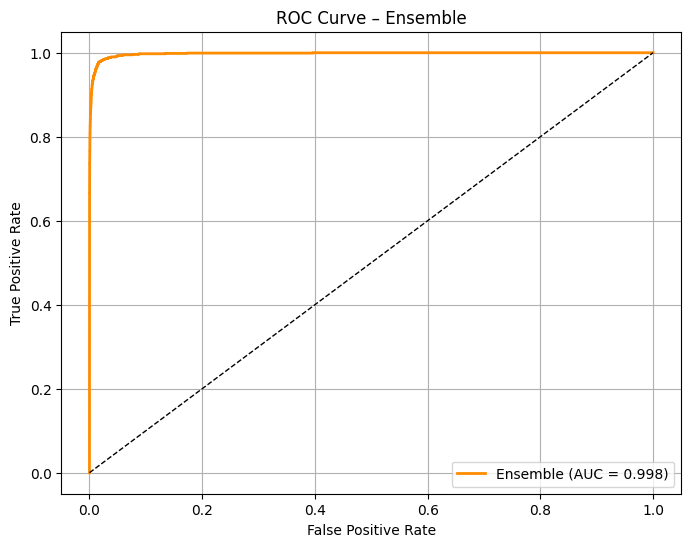

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Compute ROC
#fpr, tpr, thresholds = roc_curve(y_test, ens_probs)
fpr, tpr, thresholds = roc_curve(y_test, ensemble_probs)
#auc = roc_auc_score(y_test, ens_probs)
auc = roc_auc_score(y_test, ensemble_probs)


# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Ensemble (AUC = {auc:.3f})", color="darkorange", lw=2)
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Ensemble")
plt.legend()
plt.grid(True)
plt.show()



# C5. Precision - Recall Curves

XGBoost AUC-PR: 0.8907
LightGBM AUC-PR: 0.8844
Ensemble AUC-PR: 0.8943


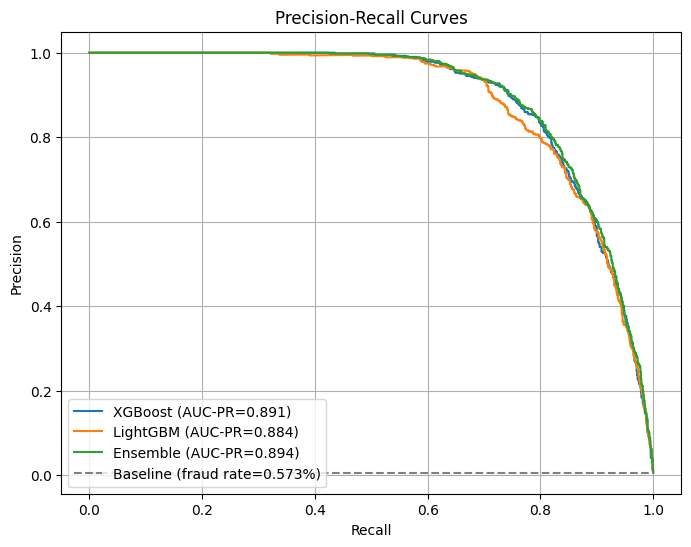


================= XGBoost =================

--- Best F1 ---
Threshold   0.5500
F1          0.8190
Precision   0.8490
Recall      0.7910
Name: 9, dtype: float64

--- Lowest Cost ---
Threshold                       0.1500
Total Estimated Loss ($)   181541.7100
Missed Frauds                 121.0000
False Alarms                  750.0000
Name: 1, dtype: float64

--- Key Metrics by Threshold ---
 Threshold  Recall  Precision     F1
    0.1000  0.9159     0.5246 0.6671
    0.1500  0.8993     0.5902 0.7126
    0.2000  0.8834     0.6438 0.7448
    0.2500  0.8626     0.6829 0.7623
    0.3000  0.8501     0.7175 0.7782
    0.3500  0.8368     0.7461 0.7889
    0.4000  0.8218     0.7747 0.7976
    0.4500  0.8152     0.8005 0.8078
    0.5000  0.8060     0.8231 0.8145
    0.5500  0.7910     0.8490 0.8190
    0.6000  0.7719     0.8615 0.8142
    0.6500  0.7569     0.8860 0.8163
    0.7000  0.7435     0.9066 0.8170
    0.7500  0.7311     0.9194 0.8145
    0.8000  0.7086     0.9290 0.8040
    0.8500 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score, precision_recall_curve

# =====================================================
# 1. Probabilities
# =====================================================
#xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
xgb_probs = imp_xgb_model.predict_proba(X_test)[:, 1]
lgb_probs = clf.predict_proba(X_test)[:, 1]   # LightGBM model (clf)
ensemble_probs = (xgb_probs + lgb_probs) / 2

# Put into dict for easy looping
model_probs = {
    "XGBoost": xgb_probs,
    "LightGBM": lgb_probs,
    "Ensemble": ensemble_probs
}

# =====================================================
# 2. AUC-PR scores
# =====================================================
aucpr_scores = {}
for name, probs in model_probs.items():
    aucpr_scores[name] = average_precision_score(y_test, probs)
    print(f"{name} AUC-PR: {aucpr_scores[name]:.4f}")

# =====================================================
# 3. PR curves
# =====================================================
plt.figure(figsize=(8,6))

for name, probs in model_probs.items():
    prec, rec, _ = precision_recall_curve(y_test, probs)
    plt.plot(rec, prec, label=f"{name} (AUC-PR={aucpr_scores[name]:.3f})")

# Random baseline = fraud prevalence
fraud_rate = (y_test == 1).mean()
plt.hlines(y=fraud_rate, xmin=0, xmax=1, colors="gray", linestyles="--",
           label=f"Baseline (fraud rate={fraud_rate:.3%})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.grid(True)
plt.show()

# =====================================================
# 4. Threshold evaluation with costs
# =====================================================
def evaluate_thresholds(y_true, y_probs, thresholds):
    results = []
    for thr in thresholds:
        y_pred = (y_probs >= thr).astype(int)

        TP = ((y_pred == 1) & (y_true == 1)).sum()
        FP = ((y_pred == 1) & (y_true == 0)).sum()
        TN = ((y_pred == 0) & (y_true == 0)).sum()
        FN = ((y_pred == 0) & (y_true == 1)).sum()

        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall    = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1        = (2 * precision * recall / (precision + recall)
                     if (precision + recall) > 0 else 0)

        # Business costs
        missed_frauds = FN
        false_alarms  = FP
        missed_cost   = missed_frauds * 191 * 4.61    # avg fraud loss
        false_cost    = false_alarms * 100            # assumed CS cost
        total_loss    = missed_cost + false_cost

        results.append({
            "Threshold": thr,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "Missed Frauds": missed_frauds,
            "Missed Fraud Cost ($191 × 4.61)": missed_cost,
            "False Alarms": false_alarms,
            "False Alarm Cost ($100 each)": false_cost,
            "Total Estimated Loss ($)": total_loss
        })

    return pd.DataFrame(results)

# =====================================================
# 5. Run evaluation for each model
# =====================================================
thresholds = np.arange(0.10, 0.91, 0.05)

for name, probs in model_probs.items():
    print(f"\n================= {name} =================")
    df_eval = evaluate_thresholds(y_test, probs, thresholds)

    # Best thresholds
    best_f1_idx   = df_eval['F1'].idxmax()
    best_cost_idx = df_eval['Total Estimated Loss ($)'].idxmin()

    print("\n--- Best F1 ---")
    print(df_eval.loc[best_f1_idx, ['Threshold','F1','Precision','Recall']])

    print("\n--- Lowest Cost ---")
    print(df_eval.loc[best_cost_idx,
        ['Threshold','Total Estimated Loss ($)','Missed Frauds','False Alarms']])

    # Summary tables
    metrics_table = df_eval[['Threshold','Recall','Precision','F1']]
    costs_table   = df_eval[['Threshold','Missed Frauds',
                             'Missed Fraud Cost ($191 × 4.61)',
                             'False Alarms','False Alarm Cost ($100 each)',
                             'Total Estimated Loss ($)']]

    pd.set_option("display.float_format", "{:.4f}".format)

    print("\n--- Key Metrics by Threshold ---")
    print(metrics_table.to_string(index=False))

    print("\n--- Business Impact by Threshold ---")
    print(costs_table.to_string(index=False))


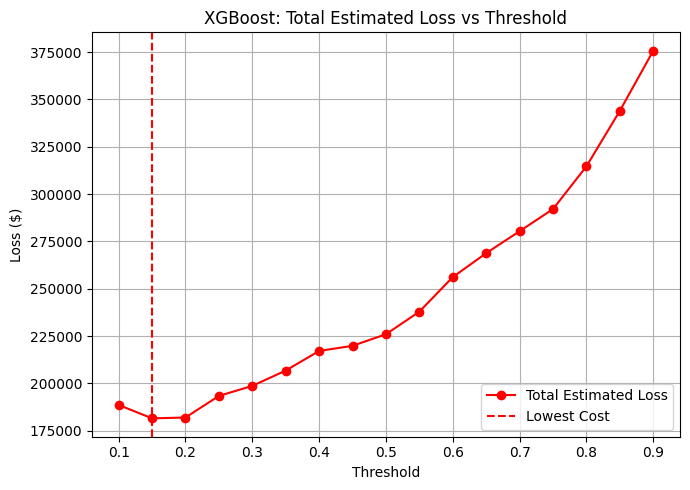

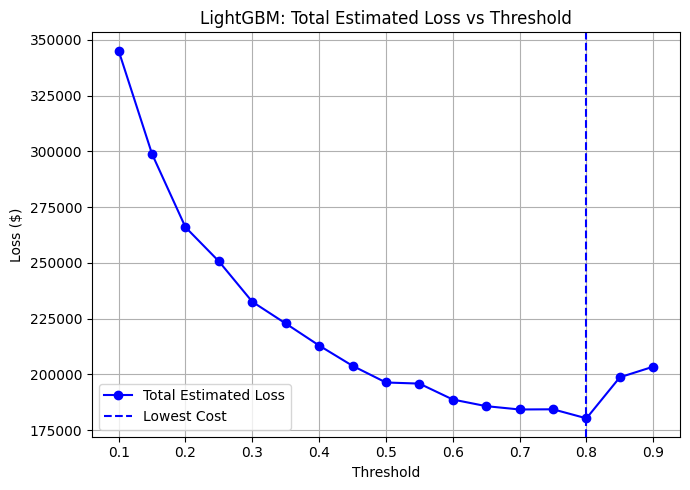

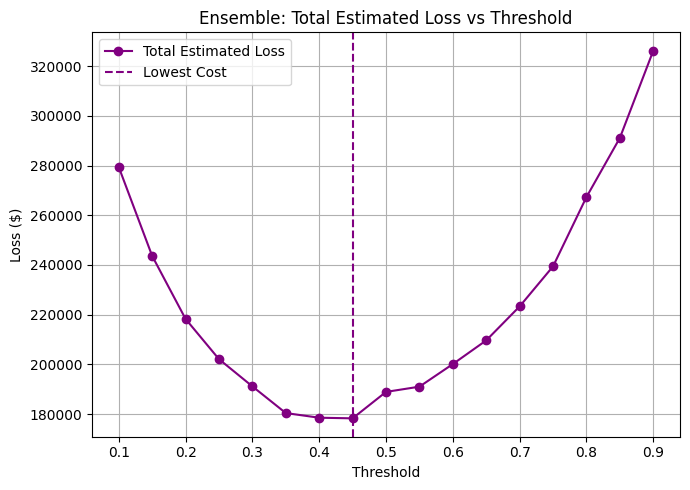

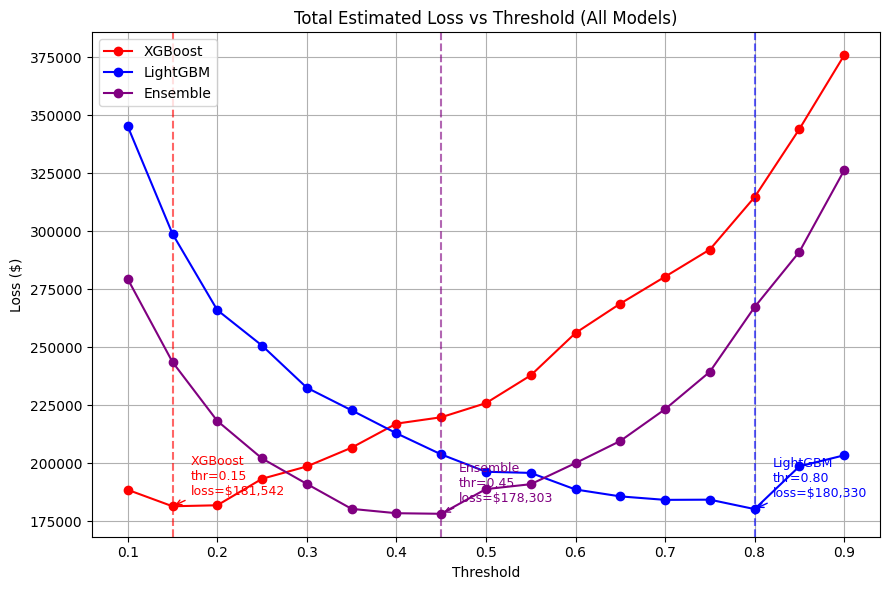

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score, precision_recall_curve

# =====================================================
# 1. Probabilities
# =====================================================
xgb_probs = imp_xgb_model.predict_proba(X_test)[:, 1]
lgb_probs = clf.predict_proba(X_test)[:, 1]   # LightGBM model
ensemble_probs = (xgb_probs + lgb_probs) / 2

model_probs = {
    "XGBoost": xgb_probs,
    "LightGBM": lgb_probs,
    "Ensemble": ensemble_probs
}

# Define consistent colors
colors = {"XGBoost": "red", "LightGBM": "blue", "Ensemble": "purple"}

# =====================================================
# 2. Threshold evaluation function
# =====================================================
def evaluate_thresholds(y_true, y_probs, thresholds):
    results = []
    for thr in thresholds:
        y_pred = (y_probs >= thr).astype(int)

        TP = ((y_pred == 1) & (y_true == 1)).sum()
        FP = ((y_pred == 1) & (y_true == 0)).sum()
        FN = ((y_pred == 0) & (y_true == 1)).sum()

        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall    = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1        = (2 * precision * recall / (precision + recall)
                     if (precision + recall) > 0 else 0)

        # Business costs
        missed_frauds = FN
        false_alarms  = FP
        missed_cost   = missed_frauds * 191 * 4.61
        false_cost    = false_alarms * 100
        total_loss    = missed_cost + false_cost

        results.append({
            "Threshold": thr,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "Missed Frauds": missed_frauds,
            "Missed Fraud Cost ($191 × 4.61)": missed_cost,
            "False Alarms": false_alarms,
            "False Alarm Cost ($100 each)": false_cost,
            "Total Estimated Loss ($)": total_loss
        })

    return pd.DataFrame(results)

# =====================================================
# 3. Threshold sweep for all models
# =====================================================
thresholds = np.arange(0.10, 0.91, 0.05)
results = {}

for name, probs in model_probs.items():
    df_eval = evaluate_thresholds(y_test, probs, thresholds)
    results[name] = df_eval

    # --- Individual plots ---
    best_cost_idx = df_eval['Total Estimated Loss ($)'].idxmin()
    plt.figure(figsize=(7,5))
    plt.plot(df_eval["Threshold"], df_eval["Total Estimated Loss ($)"],
             marker="o", color=colors[name], label="Total Estimated Loss")
    plt.axvline(df_eval.loc[best_cost_idx,'Threshold'],
                color=colors[name], linestyle='--', label='Lowest Cost')
    plt.xlabel("Threshold")
    plt.ylabel("Loss ($)")
    plt.title(f"{name}: Total Estimated Loss vs Threshold")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# =====================================================
# 4. Combined plot with annotations
# =====================================================
plt.figure(figsize=(9,6))

for name, df_eval in results.items():
    plt.plot(df_eval["Threshold"], df_eval["Total Estimated Loss ($)"],
             marker="o", color=colors[name], label=f"{name}")

    # Best threshold & loss
    best_cost_idx = df_eval['Total Estimated Loss ($)'].idxmin()
    best_thr = df_eval.loc[best_cost_idx, 'Threshold']
    best_loss = df_eval.loc[best_cost_idx, 'Total Estimated Loss ($)']

    # Vertical line
    plt.axvline(best_thr, color=colors[name], linestyle='--', alpha=0.6)

    # Annotation
    plt.annotate(f"{name}\nthr={best_thr:.2f}\nloss=${best_loss:,.0f}",
                 xy=(best_thr, best_loss),
                 xytext=(best_thr+0.02, best_loss+5000),
                 arrowprops=dict(arrowstyle="->", color=colors[name]),
                 fontsize=9, color=colors[name])

plt.xlabel("Threshold")
plt.ylabel("Loss ($)")
plt.title("Total Estimated Loss vs Threshold (All Models)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Set D. Pipeline

# D1. Predict Fraud Function

In [ ]:
import pandas as pd
import numpy as np

def safe_transform(le, values, colname=""):
    """
    Transform values using a fitted LabelEncoder.
    - Known values → normal transform.
    - Unknown values → map to 'Other' if available, else raise ValueError.
    Works with scalars, lists, numpy arrays, or pandas Series.
    """
    values = pd.Series(values).astype(str).tolist()

    # Convert to list of strings no matter what
    if not isinstance(values, (list, np.ndarray, pd.Series)):
        values = [values]


    known_classes = set(le.classes_)
    safe_vals = []
    for v in values:
        if v in known_classes:
            safe_vals.append(v)
        else:
            if "Other" in known_classes:
                print(f"⚠️ Unseen value '{v}' in column '{colname}', mapping to 'Other'")
                safe_vals.append("Other")
            else:
                raise ValueError(
                    f"❌ Unseen value '{v}' in column '{colname}'. "
                    f"Valid options include: {list(le.classes_)[:10]} ... (total {len(le.classes_)})."
                )

    return le.transform(safe_vals)




def predict_fraud(new_data: pd.DataFrame, xgb_model, lgbm_model, encoders, threshold=0.75):
    """
    Predict fraud probability and class using XGBoost + LightGBM ensemble.
    """

    # ✅ 1. Standardize column names (typo fix)
    rename_map = {"t_count_1h": "tx_count_1h", "t_count_24h": "tx_count_24h"}
    new_data = new_data.rename(columns=rename_map)

    # ✅ 2. Enforce expected feature order
    feature_order = [
        'amt', 'category', 'isMan', 'isLateEvening',
        'city_pop', 'job', 'lat', 'long',
        'secs_since_prev', 'tx_count_1h', 'tx_count_24h'
    ]

    # Add missing columns if necessary (fill with 0 or default)
    for col in feature_order:
        if col not in new_data.columns:
            new_data[col] = 0

    # ✅ 3. Encode categoricals safely
    for col, le in encoders.items():
        if col in new_data.columns:
            new_data[col] = safe_transform(le, new_data[col].astype(str))

    # Get feature order from trained XGB model
    xgb_feature_order = xgb_model.get_booster().feature_names
    print("XGB feature order:", xgb_feature_order)

    # ✅ 4. Reindex EXACTLY like training
    new_data = new_data[xgb_feature_order]

    # ✅ Debug check
    print("Final feature order:", list(new_data.columns))

    # ✅ 5. Model predictions
    xgb_prob = xgb_model.predict_proba(new_data)[:, 1]
    lgb_prob = lgbm_model.predict_proba(new_data)[:, 1]
    ensemble_prob = (xgb_prob + lgb_prob) / 2

    prediction = (ensemble_prob >= threshold).astype(int)

    return {
        "fraud_probability": float(ensemble_prob[0]),
        "prediction": "FRAUD" if prediction[0] == 1 else "LEGIT",
        "threshold": threshold
    }


# D2. Lone sample

In [ ]:
new_sample = pd.DataFrame([{
    "amt": 1123.45,
    "category": "shopping_pos",
    "isMan": 0,
    "isLateEvening": 1,
    "city_pop": 5321,
    "job": "Engineer, land",
    "lat": 40.7128,
    "long": -74.0060,
    "secs_since_prev": 3600,
    "t_count_1h": 2,       # <- even if typo here, helper will fix
    "t_count_24h": 10
}])

result = predict_fraud(new_sample, xgb_model, clf, encoders, threshold=0.1)
print(result)

XGB feature order: ['category', 'job', 'amt', 'isMan', 'isLateEvening', 'city_pop', 'lat', 'long', 'secs_since_prev', 'tx_count_1h', 'tx_count_24h']
Final feature order: ['category', 'job', 'amt', 'isMan', 'isLateEvening', 'city_pop', 'lat', 'long', 'secs_since_prev', 'tx_count_1h', 'tx_count_24h']
{'fraud_probability': 0.46895463784163754, 'prediction': 'FRAUD', 'threshold': 0.1}


# D3. Multiple samples

In [ ]:
import pandas as pd
import numpy as np

def safe_transform(le, values, colname=""):
    """
    Transform values using a fitted LabelEncoder.
    Works with scalars, lists, or Series.
    - Known values → normal transform.
    - Unknown values → map to 'Other' if available,
      else use first class and log a warning.
    """
    values = pd.Series(values).astype(str).tolist()

    known_classes = set(le.classes_)
    safe_vals = []
    mapped_info = []  # track replacements

    for v in values:
        if v in known_classes:
            safe_vals.append(v)
            mapped_info.append(v)
        else:
            if "Other" in known_classes:
                print(f"⚠️ Unseen value '{v}' in column '{colname}', mapping to 'Other'")
                safe_vals.append("Other")
                mapped_info.append("Other")
            else:
                print(f"⚠️ Unseen value '{v}' in column '{colname}', mapping to '{le.classes_[0]}' (fallback)")
                safe_vals.append(le.classes_[0])
                mapped_info.append(le.classes_[0])

    return le.transform(safe_vals).astype(int), mapped_info



def predict_fraud_m(new_data: pd.DataFrame, xgb_model, lgbm_model, encoders, threshold=0.75):
    """
    Predict fraud probability and class using XGBoost + LightGBM ensemble.
    Gracefully handles unseen categories by mapping them (not failing).
    """
    results_list = []
    feature_order = xgb_model.get_booster().feature_names

    for idx, row in new_data.iterrows():
        row = row.to_dict()
        mapped_info = {}

        # Fix typos
        if "t_count_1h" in row: row["tx_count_1h"] = row.pop("t_count_1h")
        if "t_count_24h" in row: row["tx_count_24h"] = row.pop("t_count_24h")

        # Add missing cols
        for col in feature_order:
            if col not in row:
                row[col] = 0

        # Encode categoricals safely
        for col, le in encoders.items():
            if col in row:
                row[col], mapped_vals = safe_transform(le, [row[col]], colname=col)
                row[col] = row[col][0]   # numeric code
                mapped_info[col + "_mapped"] = mapped_vals[0]  # keep mapped category

        # Build row DataFrame
        row_df = pd.DataFrame([row])[feature_order]

        # Predictions
        xgb_prob = xgb_model.predict_proba(row_df)[:, 1][0]
        lgb_prob = lgbm_model.predict_proba(row_df)[:, 1][0]
        ensemble_prob = (xgb_prob + lgb_prob) / 2
        prediction = "FRAUD" if ensemble_prob >= threshold else "LEGIT"

        # Collect results
        results_list.append({
            **row,
            **mapped_info,  # adds *_mapped columns
            "fraud_probability": ensemble_prob,
            "prediction": prediction,
            "threshold": threshold
        })

    return pd.DataFrame(results_list)


In [ ]:
test_vals = ["Engineer, land", "Engineer"]
encoded = safe_transform(encoders["job"], test_vals, colname="job")
print(encoded)

⚠️ Unseen value 'Engineer' in column 'job', mapping to 'Academic librarian' (fallback)
(array([165,   0]), ['Engineer, land', 'Academic librarian'])


In [ ]:
# Multiple new transactions
import pandas as pd
import numpy as np
new_samples = pd.DataFrame([
    {
        "amt": 123.45, "category": "shopping_pos", "isMan": 1, "isLateEvening": 0,
        "city_pop": 54321, "job": "Engineer, land", "lat": 40.7128, "long": -74.0060,
        "secs_since_prev": 3600, "t_count_1h": 2, "t_count_24h": 10
    },
    {
        "amt": 189.00, "category": "gas_transport", "isMan": 0, "isLateEvening": 1,
        "city_pop": 12000, "job": "Engineer",
        "lat": 34.0522, "long": -118.2437,
        "secs_since_prev": 120, "tx_count_1h": 1, "tx_count_24h": 7
    }
])

results = predict_fraud_m(new_samples, xgb_model, clf, encoders, threshold=0.75)
print(results[["fraud_probability", "prediction"]])

⚠️ Unseen value 'Engineer' in column 'job', mapping to 'Academic librarian' (fallback)
   fraud_probability prediction
0             0.0000      LEGIT
1             0.0127      LEGIT


In [ ]:
import pandas as pd
import numpy as np
def predict_fraud_simple(new_data: pd.DataFrame, xgb_model, lgbm_model, encoders, threshold=0.75):
    """
    Predict fraud with XGB + LGBM ensemble.
    If an unseen category is found → return Unknown Category (no calculations).
    """
    results = []
    feature_order = xgb_model.get_booster().feature_names

    for idx, row in new_data.iterrows():
        row = row.to_dict()

        # Check for unseen categories
        unseen_flag = False
        for col, le in encoders.items():
            if col in row:
                if str(row[col]) not in le.classes_:
                    results.append({
                        "index": idx,
                        "fraud_probability": -1,
                        "prediction": f"Unknown Category in '{col}': " + str(row[col])
                    })
                    unseen_flag = True
                    break  # skip this row entirely

        if unseen_flag:
            continue  # jump to next row

        # Encode categoricals
        for col, le in encoders.items():
            if col in row:
                row[col] = le.transform([str(row[col])])[0]

        # Build DataFrame with numeric values only
        row_df = pd.DataFrame([row])[feature_order].astype(float)

        # Predictions
        xgb_prob = xgb_model.predict_proba(row_df)[:, 1][0]
        lgb_prob = lgbm_model.predict_proba(row_df)[:, 1][0]
        ensemble_prob = (xgb_prob + lgb_prob) / 2
        prediction = "FRAUD" if ensemble_prob >= threshold else "LEGIT"

        results.append({
            "index": idx,
            "fraud_probability": ensemble_prob,
            "prediction": prediction
        })

    return pd.DataFrame(results)


In [ ]:
# Multiple new transactions
import pandas as pd
import numpy as np
new_samples = pd.DataFrame([
    {
        "amt": 123.45, "category": "shopping_pos", "isMan": 1, "isLateEvening": 0,
        "city_pop": 54321, "job": "Engineer, land", "lat": 40.7128, "long": -74.0060,
        "secs_since_prev": 3600, "t_count_1h": 2, "t_count_24h": 10
    },
    {
        "amt": 189.00, "category": "gas_transport", "isMan": 0, "isLateEvening": 1,
        "city_pop": 12000, "job": "Engineer",
        "lat": 34.0522, "long": -118.2437,
        "secs_since_prev": 120, "tx_count_1h": 1, "tx_count_24h": 7
    }
])

results = predict_fraud_simple(new_samples, xgb_model, clf, encoders, threshold=0.75)
print(results[["fraud_probability", "prediction"]])

   fraud_probability                           prediction
0             0.0000                                LEGIT
1            -1.0000  Unknown Category in 'job': Engineer


# Set E. Deploying

# E1. Saving models

In [ ]:
import os

os.makedirs("artifacts", exist_ok=True)


In [ ]:
joblib.dump(imp_xgb_model, "artifacts/imp_xgb_model.pkl")
joblib.dump(clf, "artifacts/lgbm_model.pkl")
joblib.dump(encoders, "artifacts/encoders.pkl")


['artifacts/encoders.pkl']

In [ ]:
# save_artifacts.py
import joblib
import json

# assuming these exist in memory from your notebook:
# xgb_model, clf (LightGBM), encoders (dict[col] = fitted LabelEncoder)
# feature_order = xgb_model.get_booster().feature_names
# thresholds you care about, e.g. best_f1 and lowest_cost

artifacts = {
    "feature_order": list(xgb_model.get_booster().feature_names),
    "thresholds": {
        "best_f1": 0.75,      # from ensemble results
        "lowest_cost": 0.40   # from ensemble results
    },
    "costs": {
        "avg_txn_value": 100,
        "fraud_txn_cost": 191,
        "fraud_multiplier": 4.61
    }
}

joblib.dump(xgb_model, "artifacts/xgb_model.pkl")
joblib.dump(clf, "artifacts/lgbm_model.pkl")
joblib.dump(encoders, "artifacts/encoders.pkl")

with open("artifacts/metadata.json", "w") as f:
    json.dump(artifacts, f, indent=2)


In [ ]:
# Install git-lfs if you plan to store large artifacts
!git lfs install

# Clone your new repo (replace URL with your repo’s link)
!git clone https://github.com/leonfr98/fraud-detector.git

# Move into that repo
%cd fraud-detector


Git LFS initialized.
Cloning into 'fraud-detector'...
/content/fraud-detector


In [ ]:
import joblib

# Bundle everything in one object
pipeline_bundle = {
    "xgb_model": imp_xgb_model,
    "lgbm_model": clf,
    "encoders": encoders,
    "threshold": 0.75
}

# Save
joblib.dump(pipeline_bundle, "fraud_pipeline.pkl")

['fraud_pipeline.pkl']

In [ ]:
#fraud_pipeline.py
import pandas as pd
import numpy as np

def safe_transform(le, values, colname=""):
    values = pd.Series(values).astype(str).tolist()
    if not isinstance(values, (list, np.ndarray, pd.Series)):
        values = [values]

    known_classes = set(le.classes_)
    safe_vals = []
    for v in values:
        if v in known_classes:
            safe_vals.append(v)
        else:
            if "Other" in known_classes:
                print(f"⚠️ Unseen value '{v}' in column '{colname}', mapping to 'Other'")
                safe_vals.append("Other")
            else:
                raise ValueError(f"❌ Unseen value '{v}' in column '{colname}'.")
    return le.transform(safe_vals)


def predict_fraud(new_data: pd.DataFrame, xgb_model, lgbm_model, encoders, threshold=0.75):
    rename_map = {"t_count_1h": "tx_count_1h", "t_count_24h": "tx_count_24h"}
    new_data = new_data.rename(columns=rename_map)

    feature_order = [
        'amt', 'category', 'isMan', 'isLateEvening',
        'city_pop', 'job', 'lat', 'long',
        'secs_since_prev', 'tx_count_1h', 'tx_count_24h'
    ]

    for col in feature_order:
        if col not in new_data.columns:
            new_data[col] = 0

    for col, le in encoders.items():
        if col in new_data.columns:
            new_data[col] = safe_transform(le, new_data[col].astype(str))

    xgb_feature_order = xgb_model.get_booster().feature_names
    new_data = new_data[xgb_feature_order]

    xgb_prob = xgb_model.predict_proba(new_data)[:, 1]
    lgb_prob = lgbm_model.predict_proba(new_data)[:, 1]
    ensemble_prob = (xgb_prob + lgb_prob) / 2

    prediction = (ensemble_prob >= threshold).astype(int)

    return {
        "fraud_probability": float(ensemble_prob[0]),
        "prediction": "FRAUD" if prediction[0] == 1 else "LEGIT",
        "threshold": threshold
    }


In [ ]:
#requirements.txt
streamlit>=1.37.0
pandas>=2.0.0
numpy>=1.24.0
scikit-learn>=1.3.0
xgboost>=1.7.0
lightgbm>=4.0.0
joblib>=1.3.0